<a href="https://colab.research.google.com/github/prakash-pg/Rain_Prediction_using_ML/blob/main/Rain_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
%matplotlib inline

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
df=  pd.read_csv("/content/drive/MyDrive/weatherAUS.csv")
pd.set_option("display.max_columns", None)

In [26]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [27]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [28]:
num_var = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_var = [feature for feature in num_var if len(df[feature].unique()) <= 25]
cont_var = [feature for feature in num_var if feature not in discrete_var]
categ_var = [feature for feature in df.columns if feature not in num_var]

In [29]:
df[categ_var]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No
145458,2017-06-24,Uluru,SE,SSE,N,No,No


In [30]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [31]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [32]:
def find_var_type(var):


    if var in discrete_var:
        print("{} is a Numerical Variable, Discrete in nature".format(var))
    elif var in cont_var :
        print("{} is a Numerical Variable, Continuous in nature".format(var))
    else :
        print("{} is a Categorical Variable".format(var))

In [33]:
find_var_type('Cloud3pm')

Cloud3pm is a Numerical Variable, Discrete in nature


In [34]:
def RandomSampleImputation(df, feature):
    df[feature]=df[feature]
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature]=random_sample

In [35]:
RandomSampleImputation(df, "Cloud9am")
RandomSampleImputation(df, "Cloud3pm")
RandomSampleImputation(df, "Evaporation")
RandomSampleImputation(df, "Sunshine")

In [36]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation       0.000000
Sunshine          0.000000
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [37]:
find_var_type('RainToday')

RainToday is a Categorical Variable


In [38]:
def MeanImputation(df, feature):
    df[feature]= df[feature]
    mean= df[feature].mean()
    df[feature]= df[feature].fillna(mean)

In [39]:
MeanImputation(df,'Pressure3pm')

In [40]:
MeanImputation(df, 'Pressure9am')
MeanImputation(df, 'MinTemp')
MeanImputation(df, 'MaxTemp')
MeanImputation(df, 'Rainfall')
MeanImputation(df, 'WindGustSpeed')
MeanImputation(df, 'WindSpeed9am')
MeanImputation(df, 'WindSpeed3pm')
MeanImputation(df, 'Pressure9am')
MeanImputation(df, 'Humidity9am')
MeanImputation(df, 'Humidity3pm')
MeanImputation(df, 'Temp3pm')
MeanImputation(df, 'Temp9am')

In [41]:
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

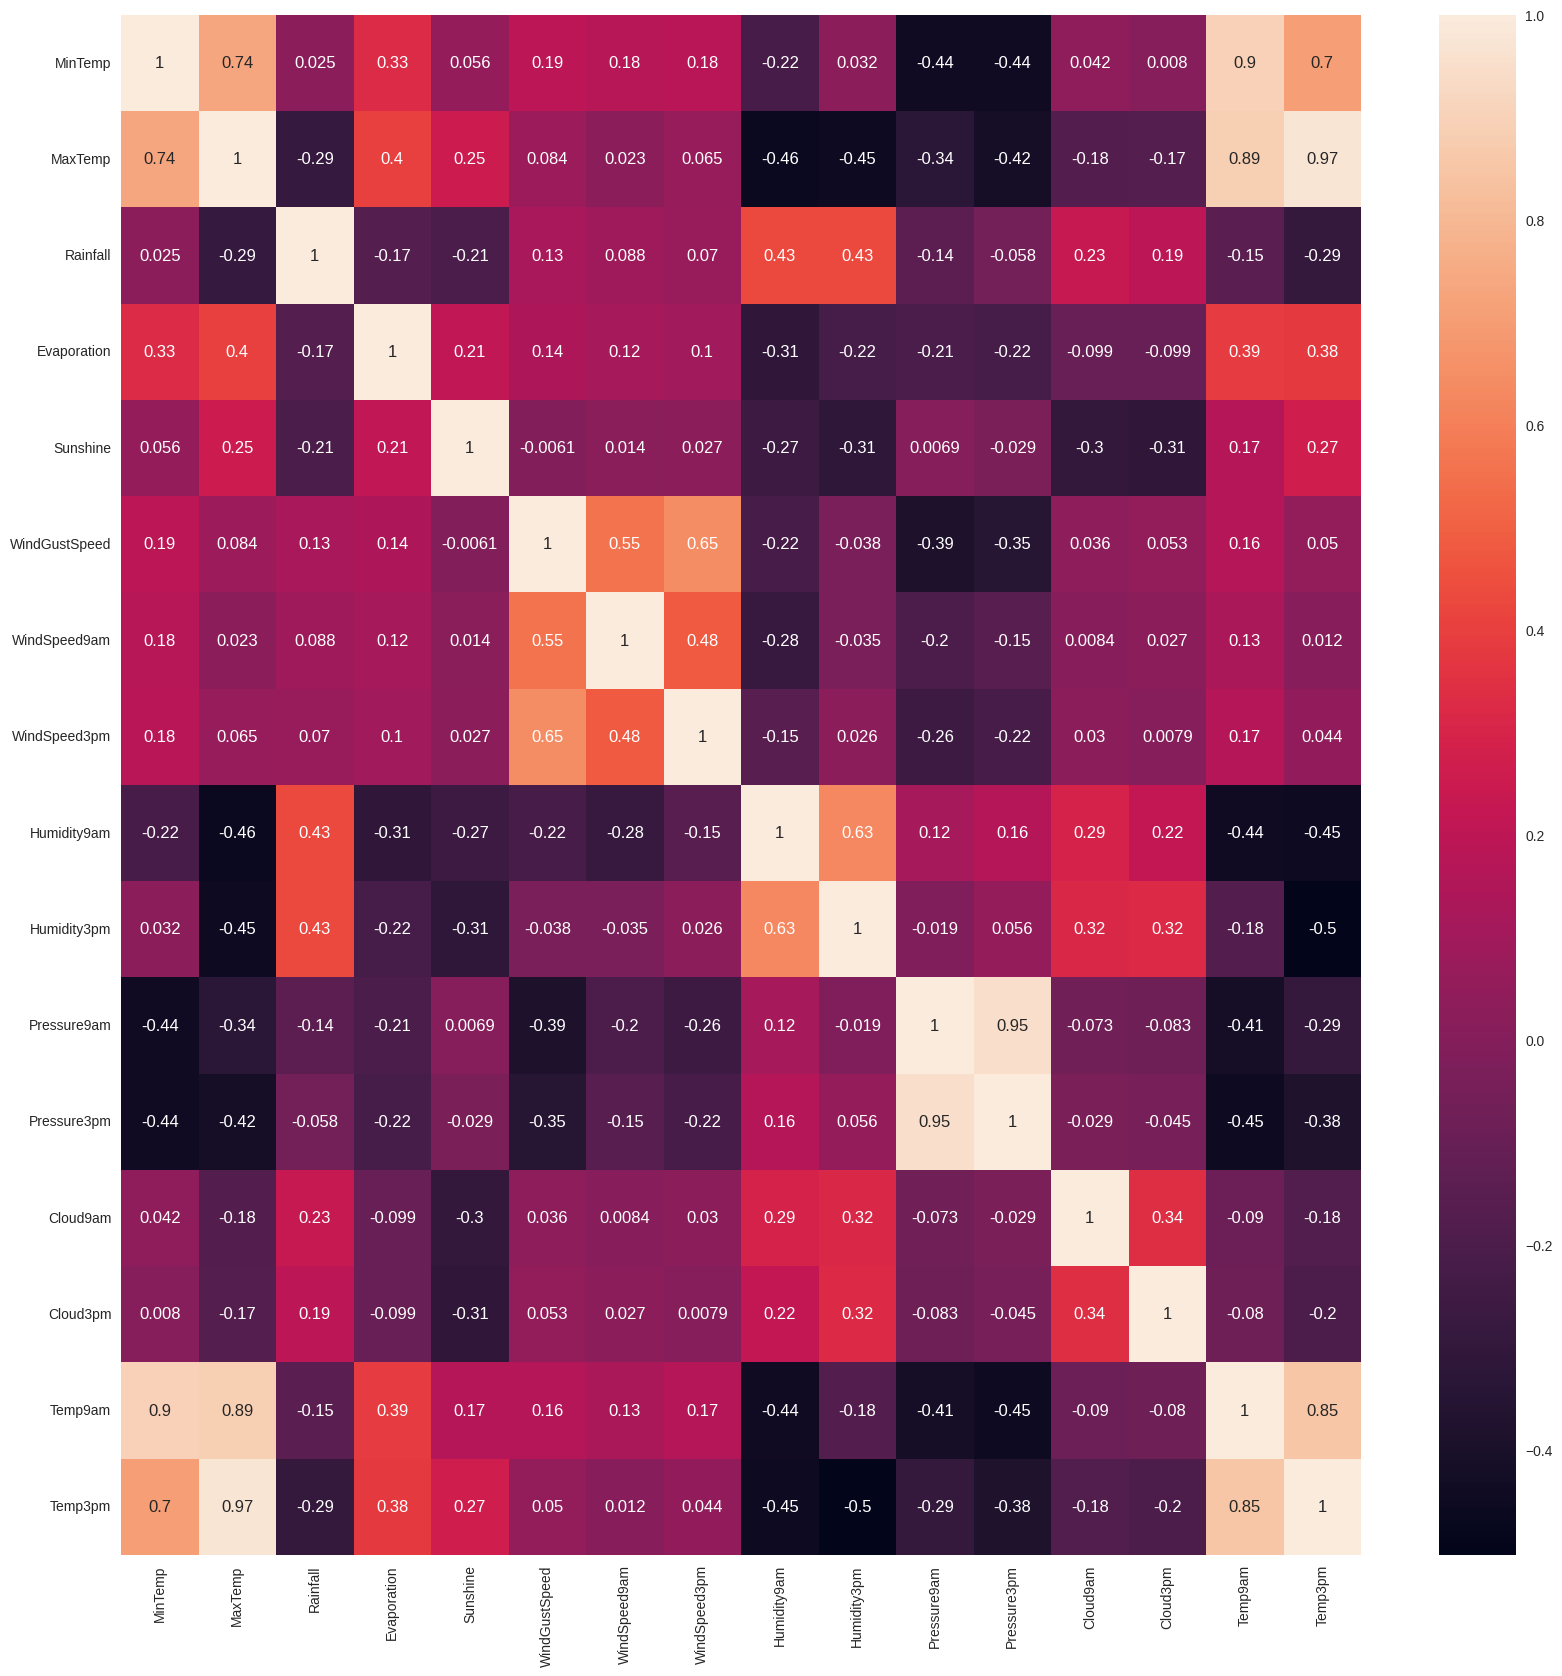

In [42]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

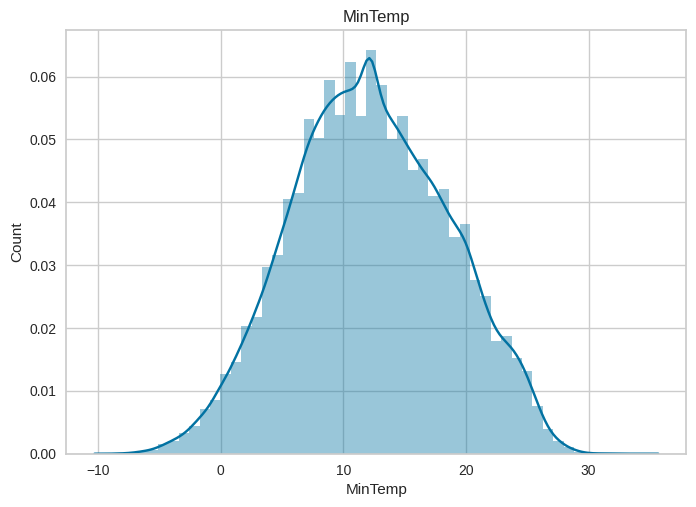

<Figure size 1500x1500 with 0 Axes>

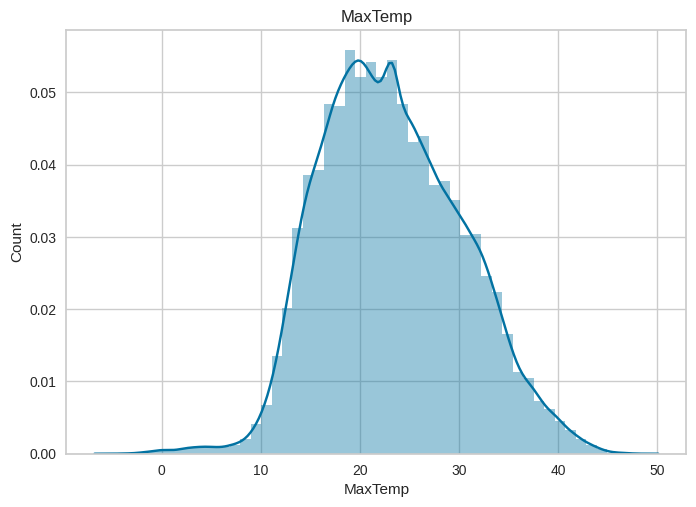

<Figure size 1500x1500 with 0 Axes>

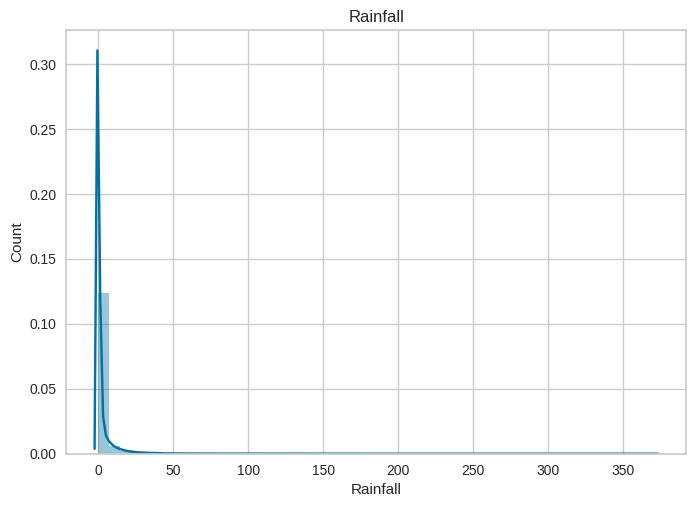

<Figure size 1500x1500 with 0 Axes>

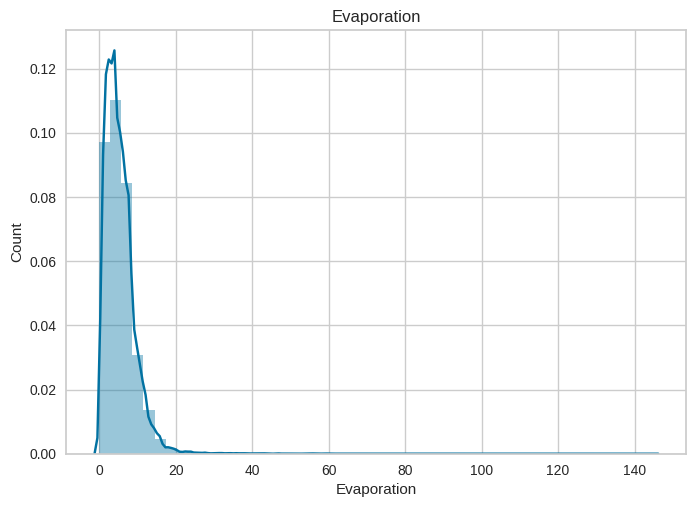

<Figure size 1500x1500 with 0 Axes>

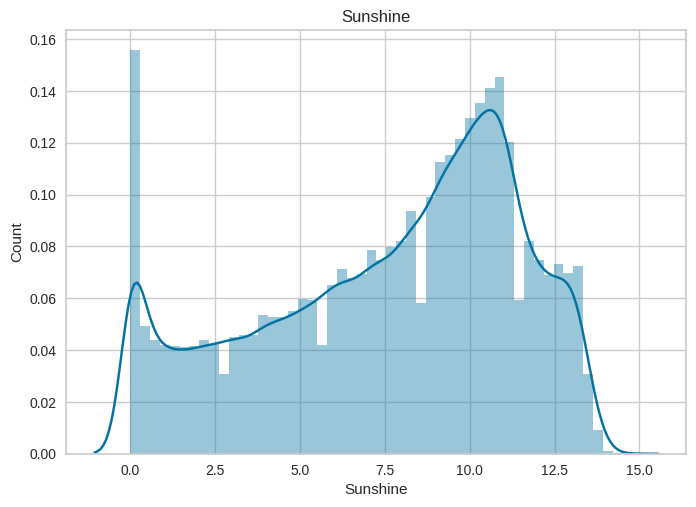

<Figure size 1500x1500 with 0 Axes>

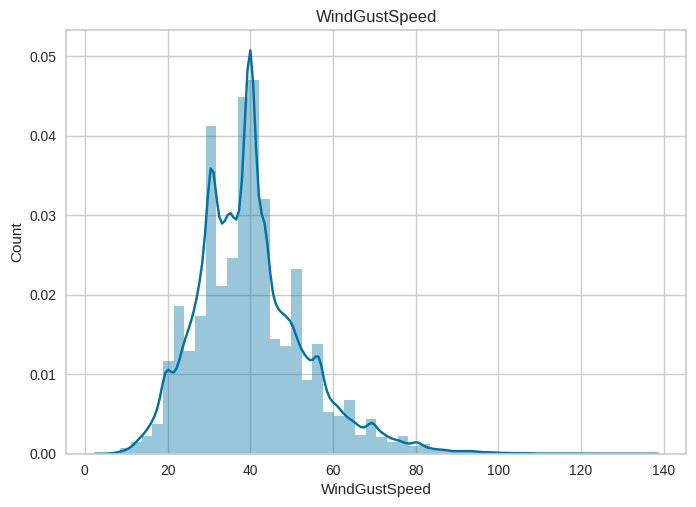

<Figure size 1500x1500 with 0 Axes>

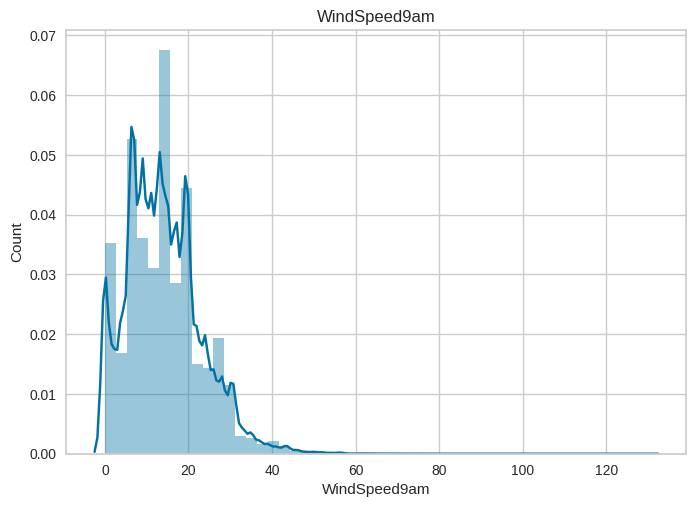

<Figure size 1500x1500 with 0 Axes>

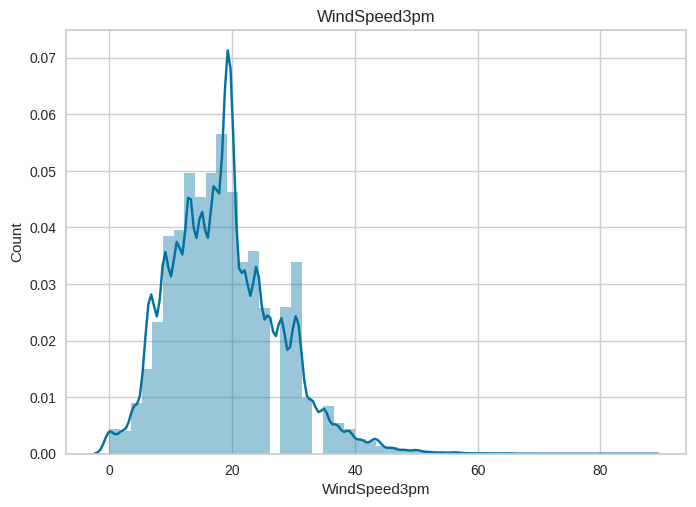

<Figure size 1500x1500 with 0 Axes>

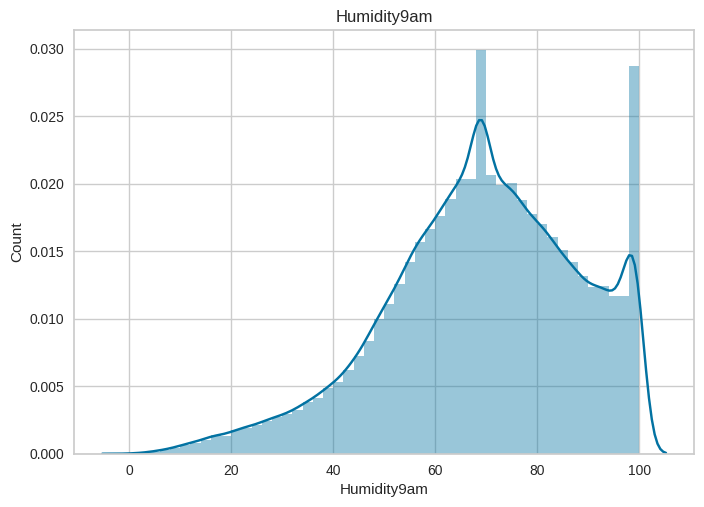

<Figure size 1500x1500 with 0 Axes>

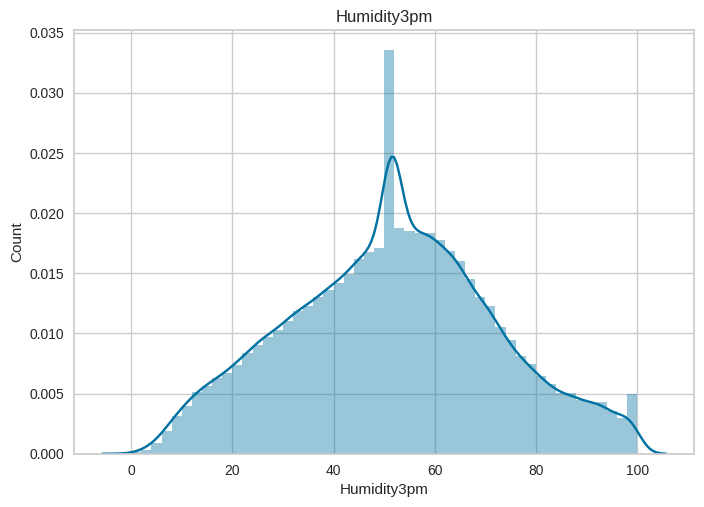

<Figure size 1500x1500 with 0 Axes>

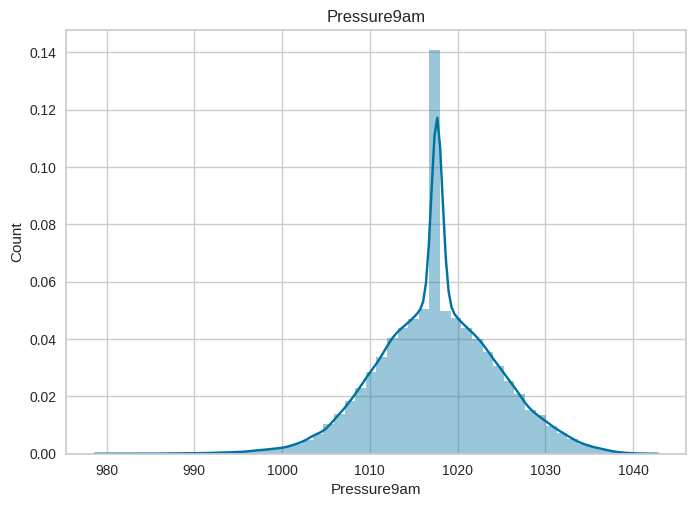

<Figure size 1500x1500 with 0 Axes>

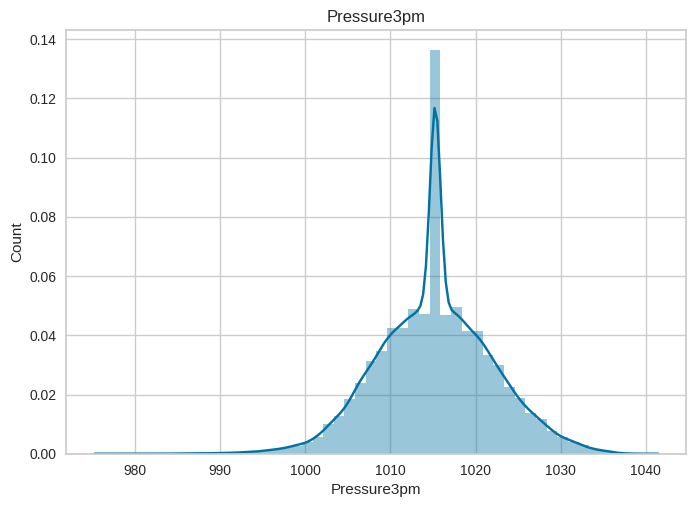

<Figure size 1500x1500 with 0 Axes>

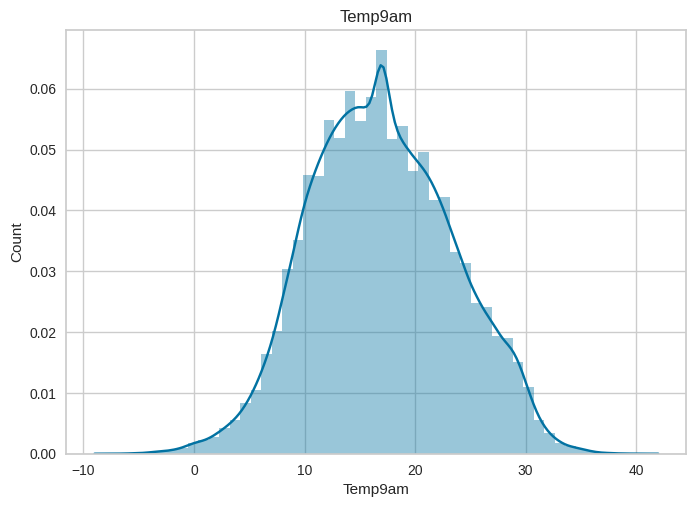

<Figure size 1500x1500 with 0 Axes>

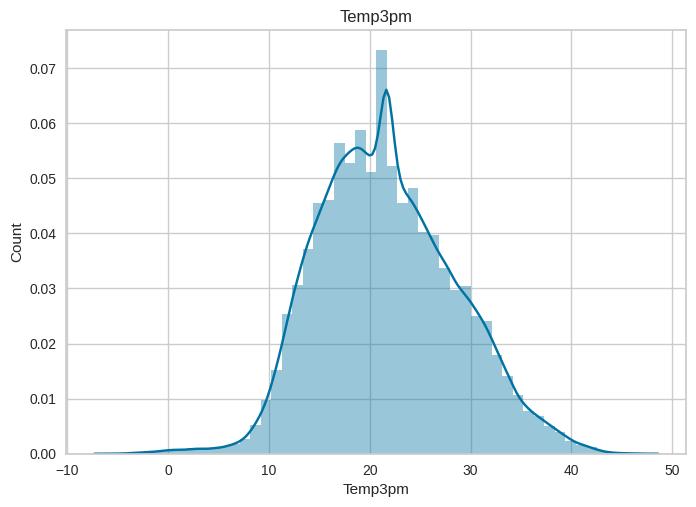

<Figure size 1500x1500 with 0 Axes>

In [43]:
for feature in cont_var:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

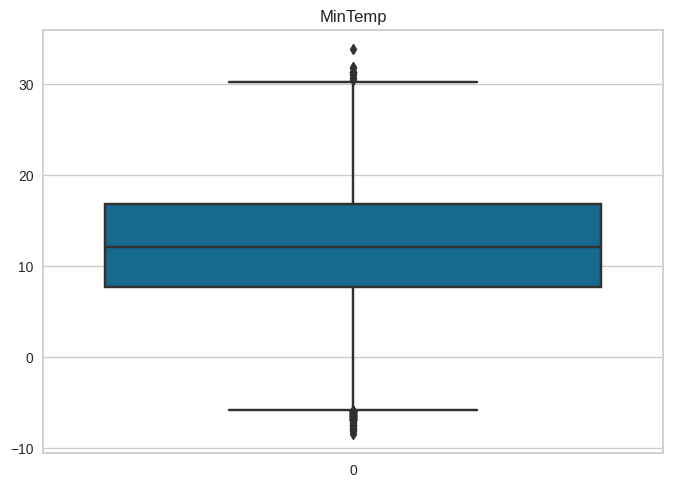

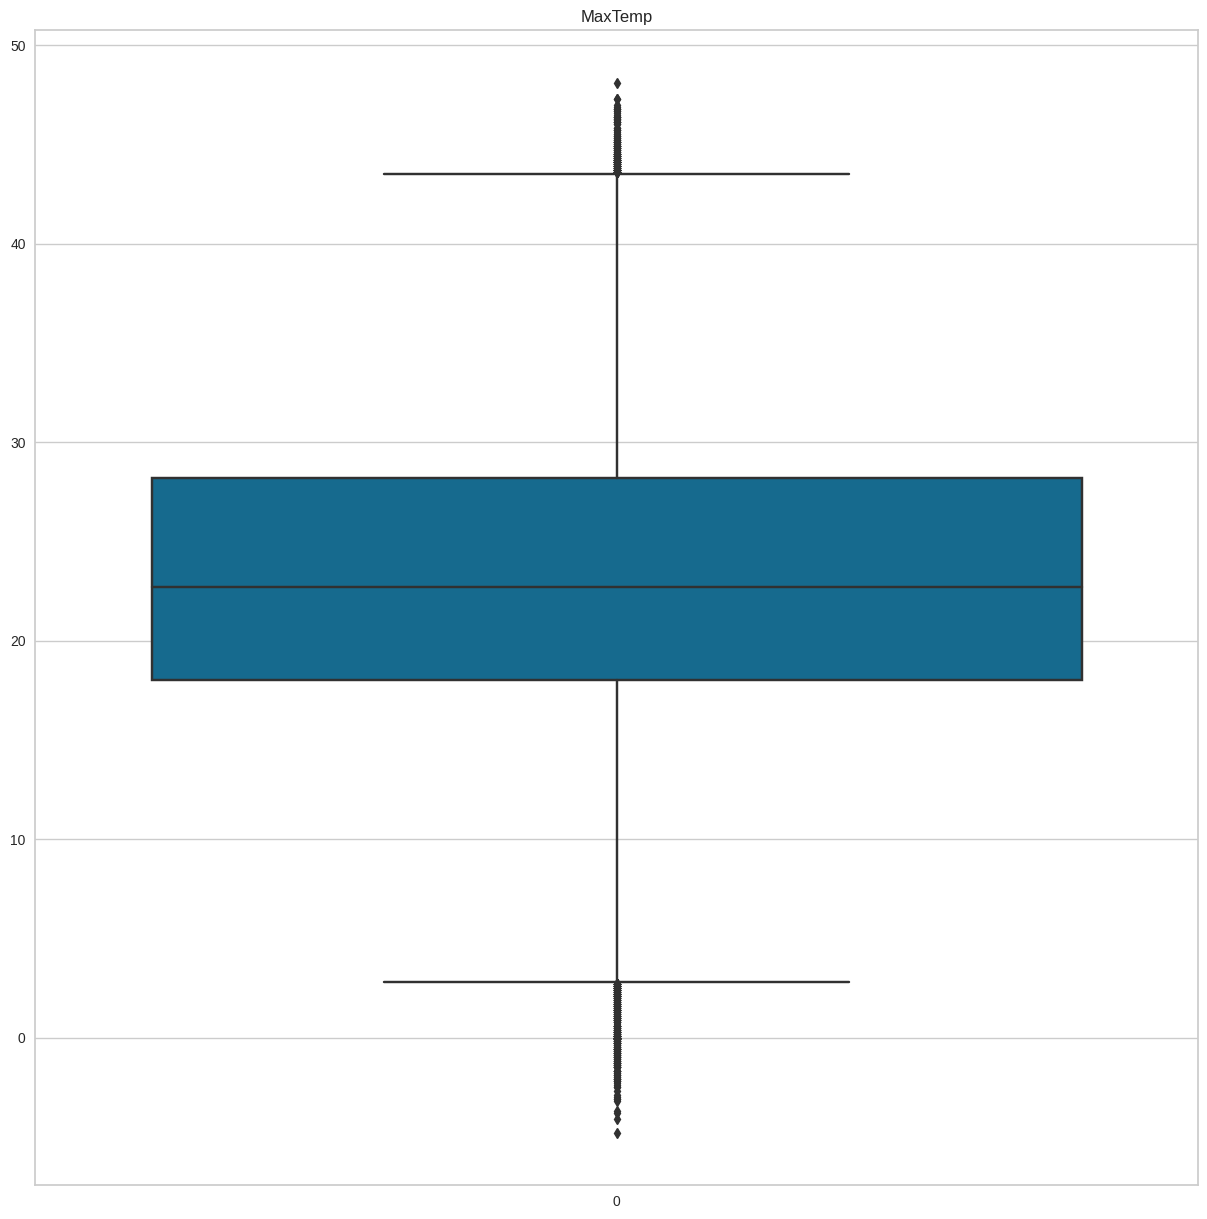

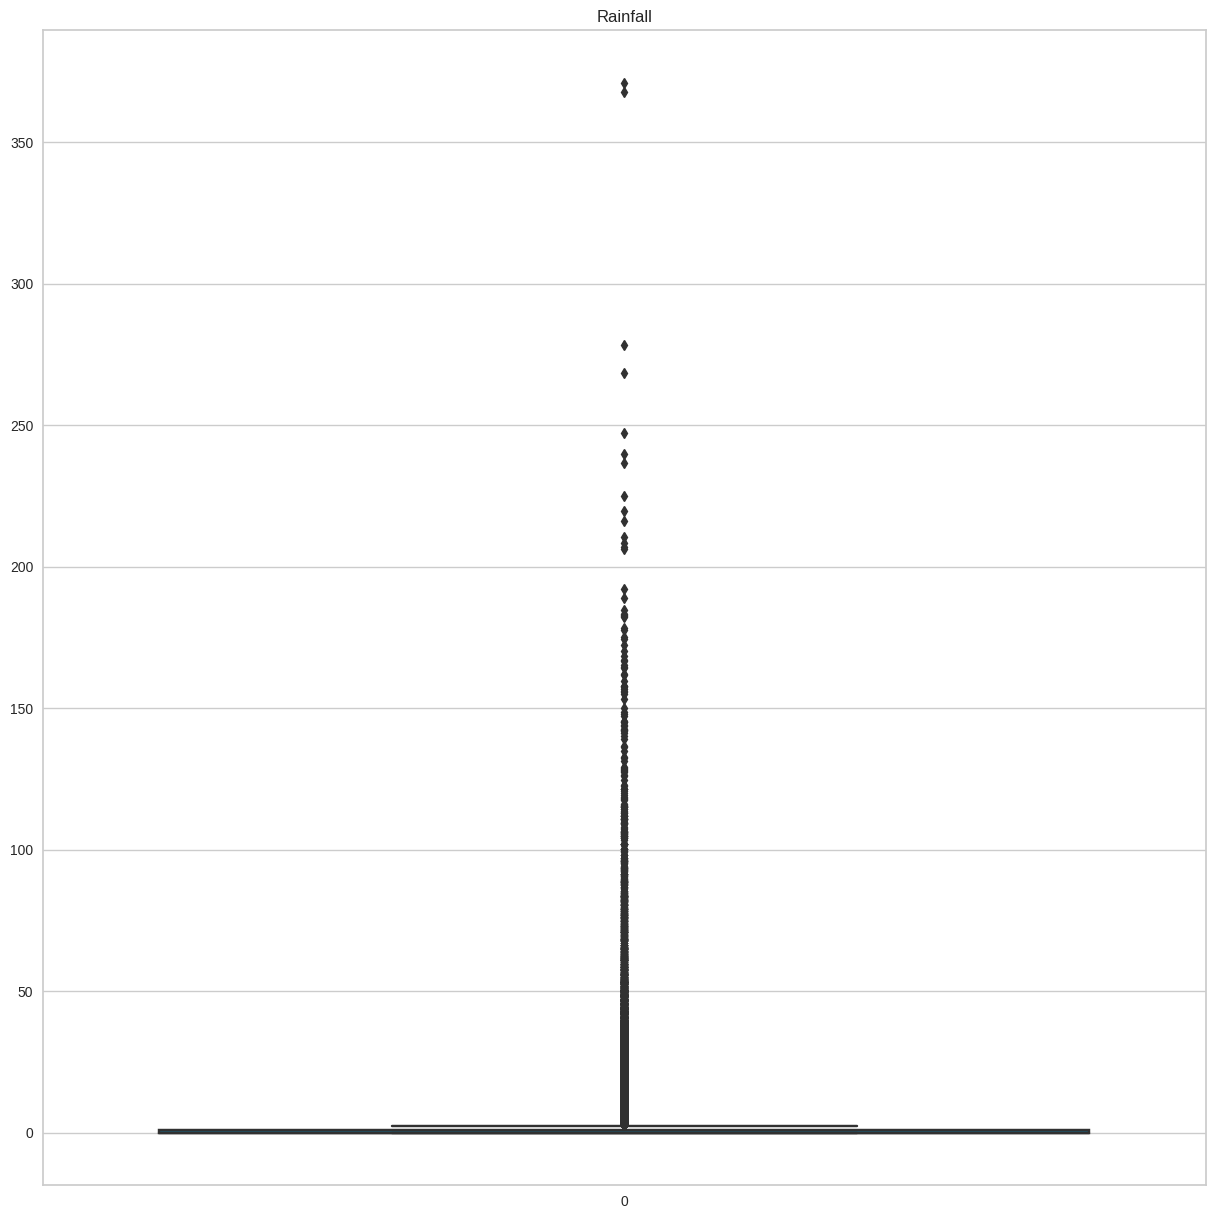

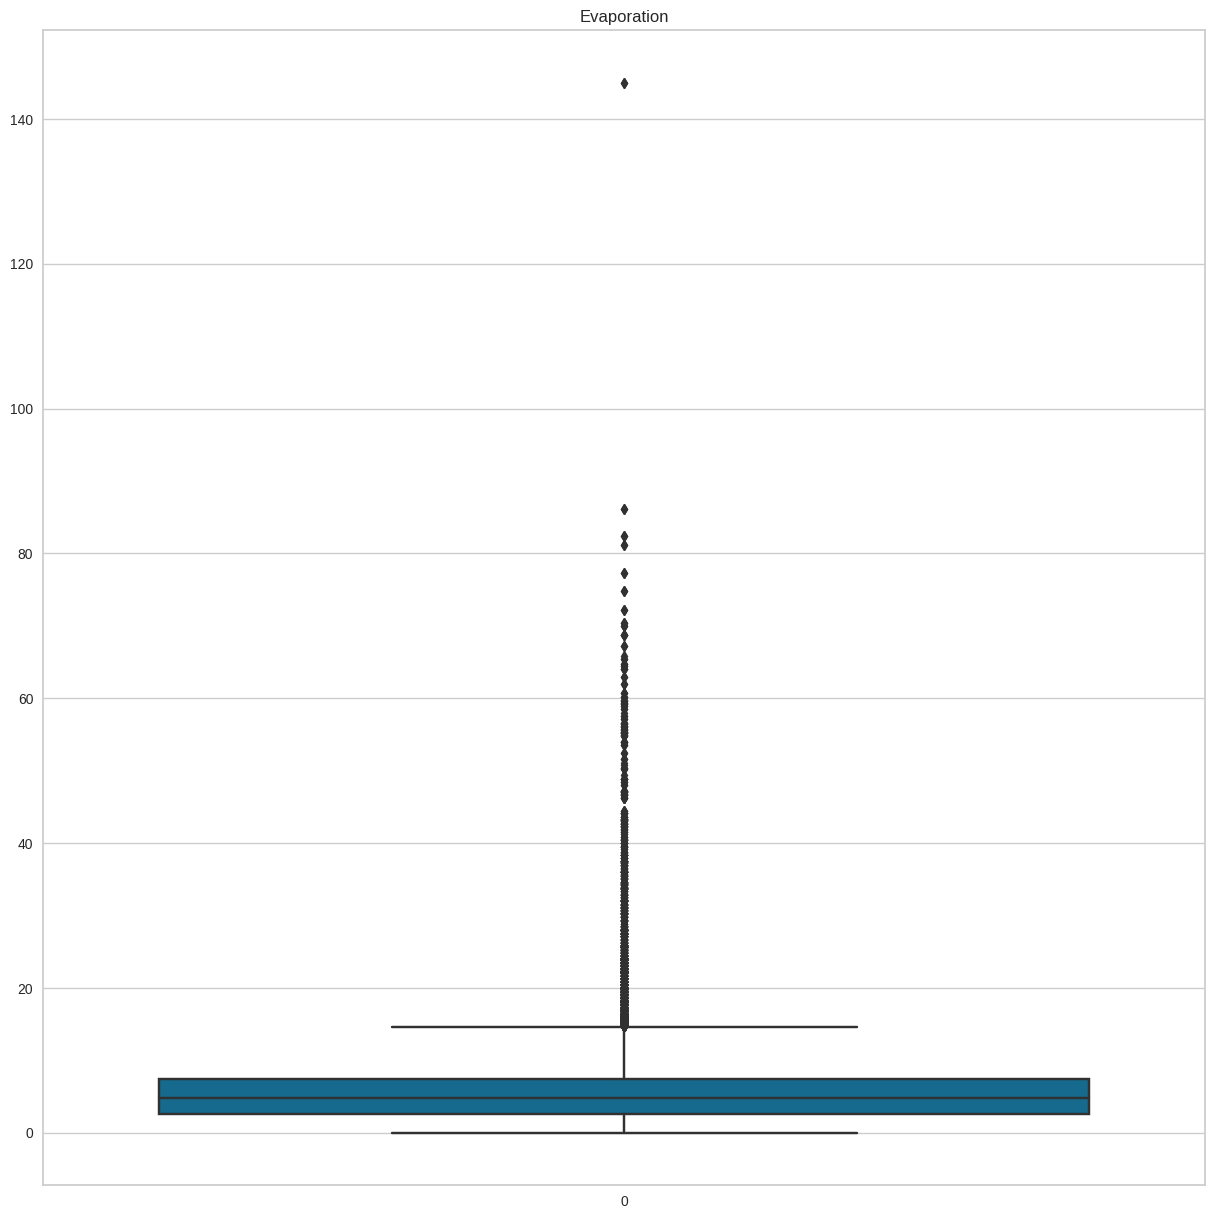

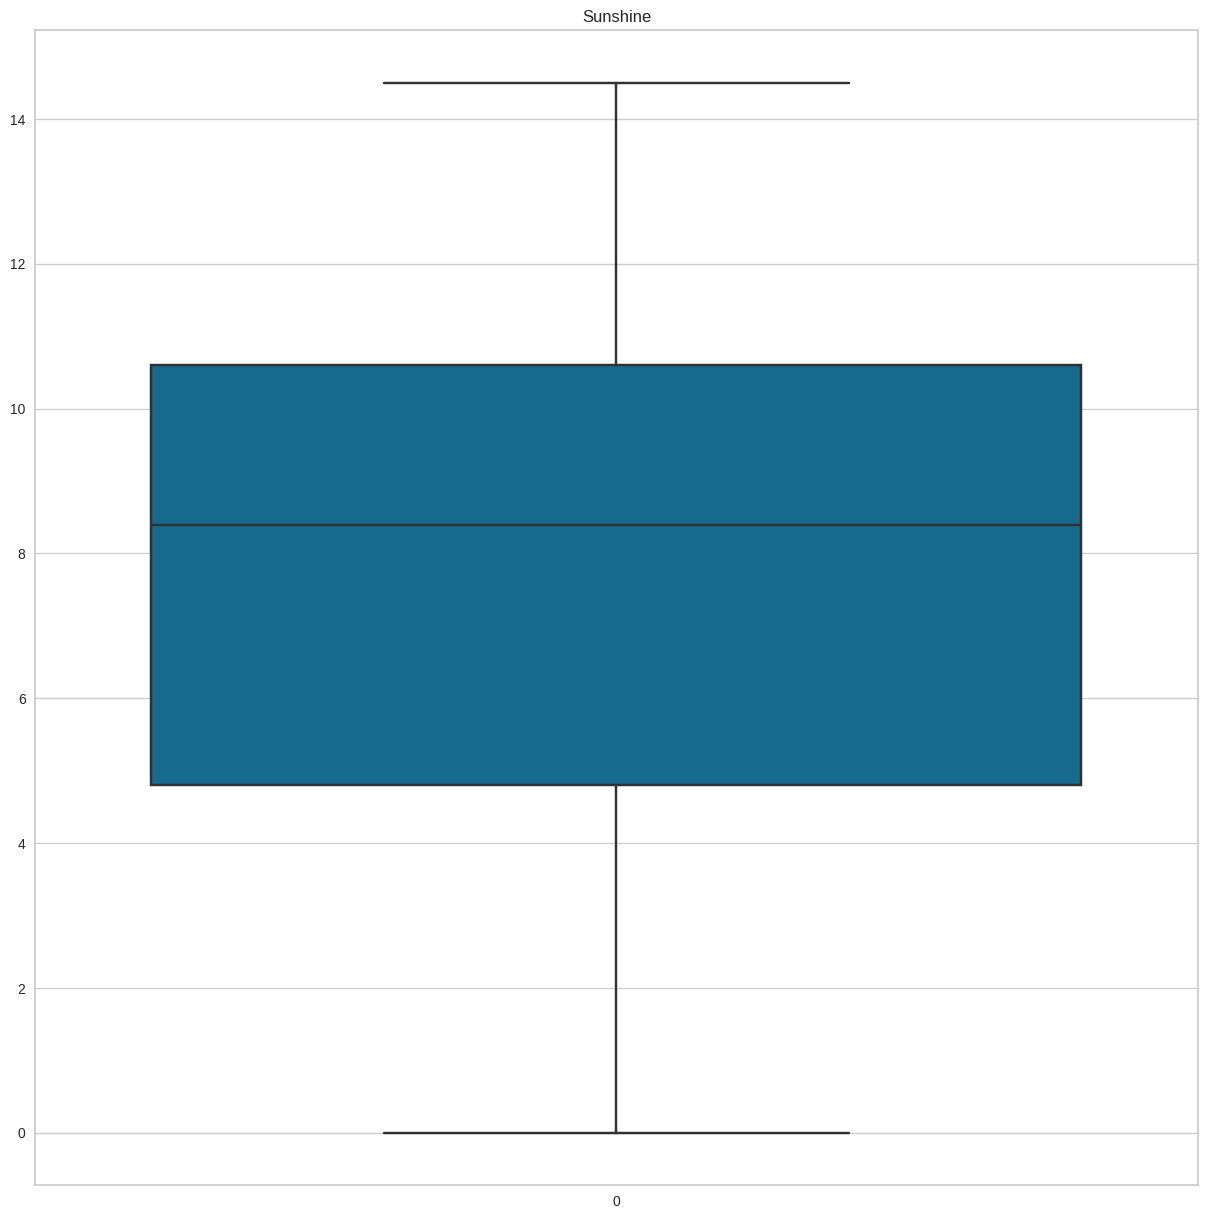

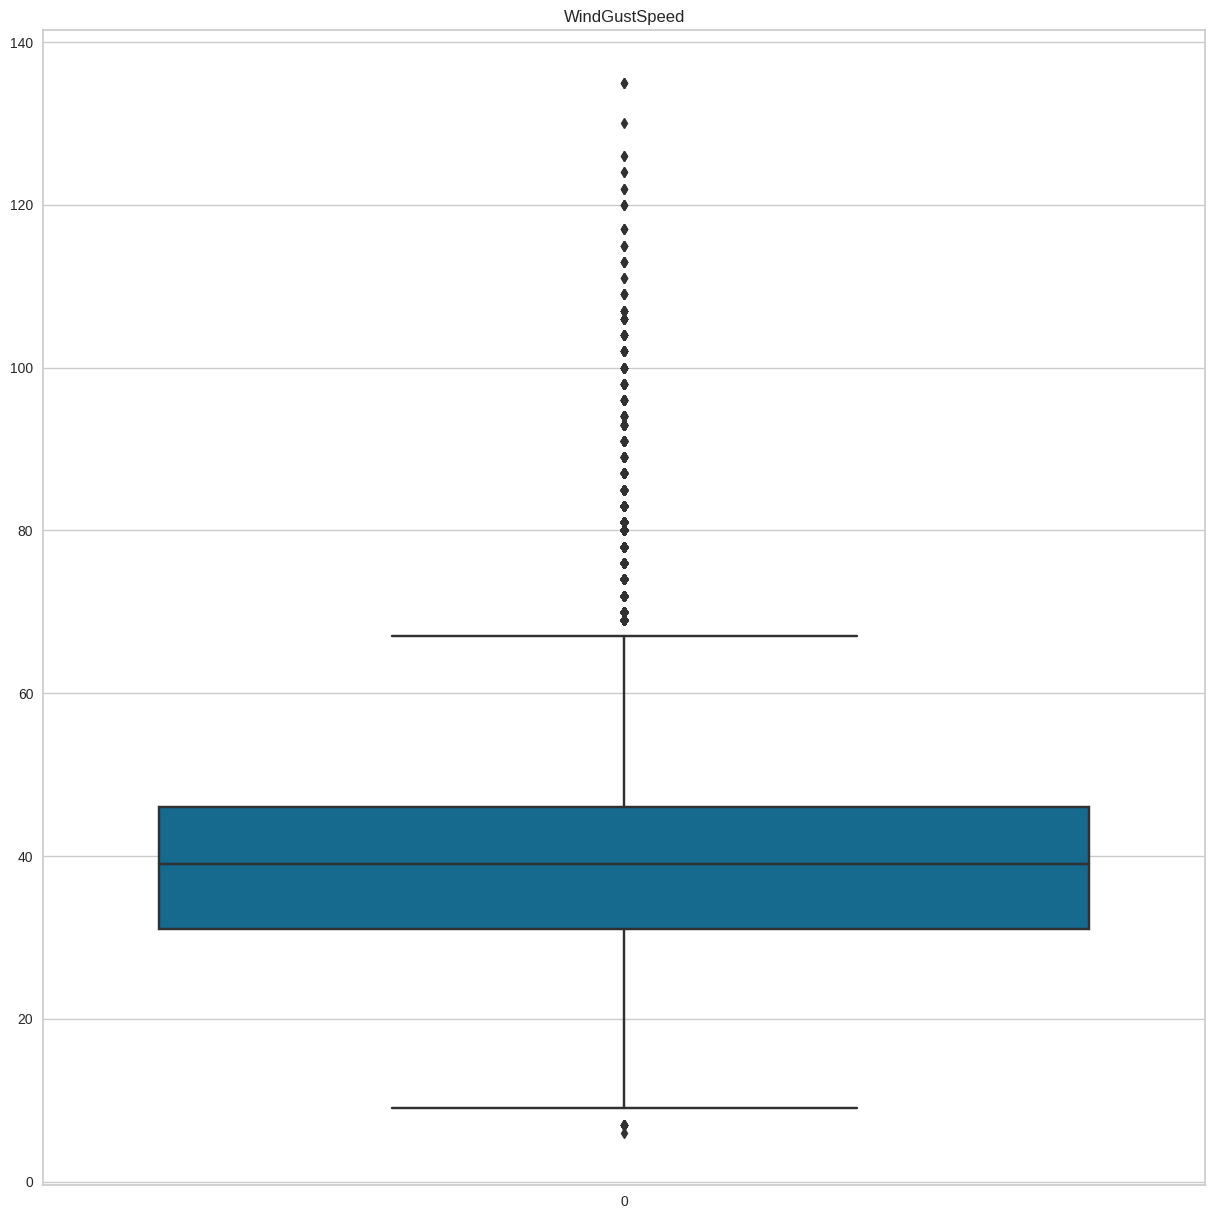

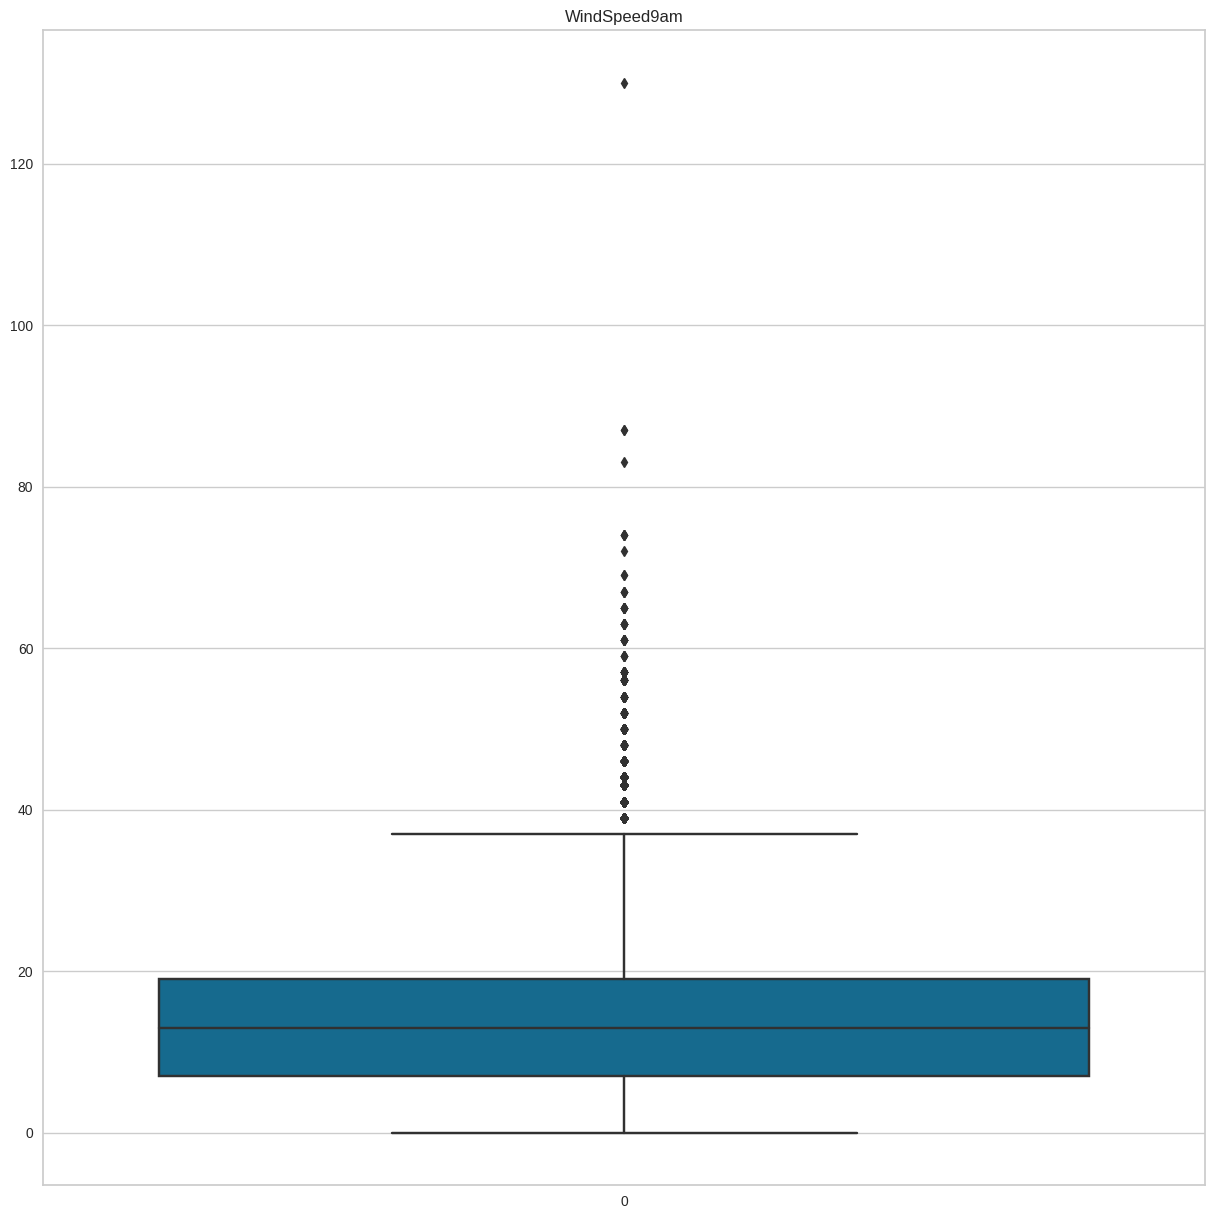

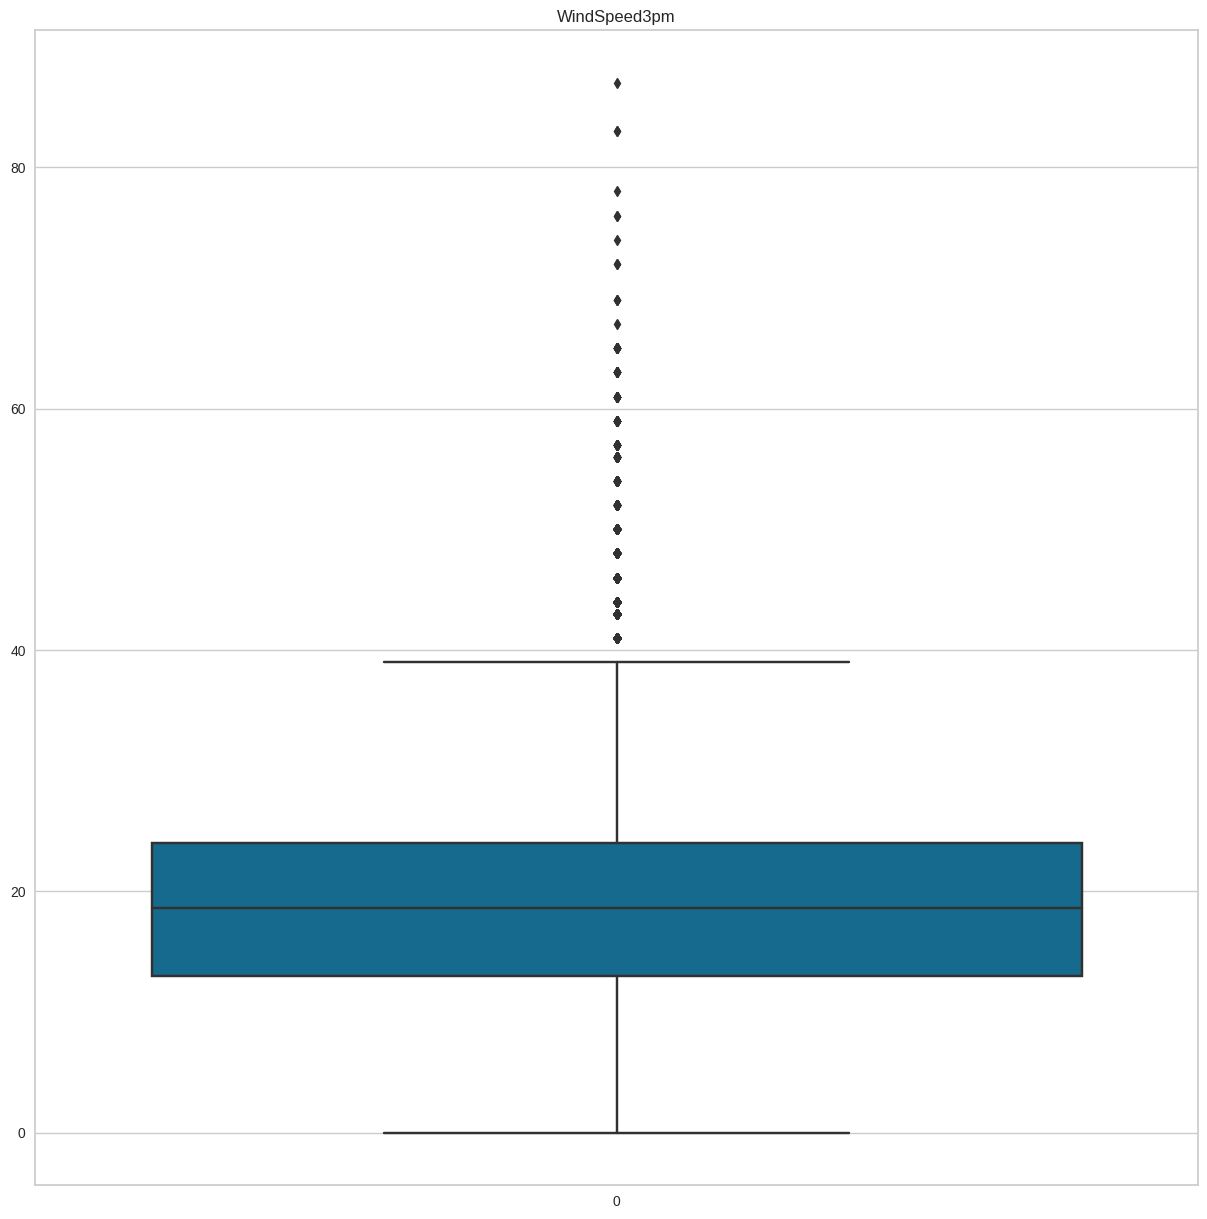

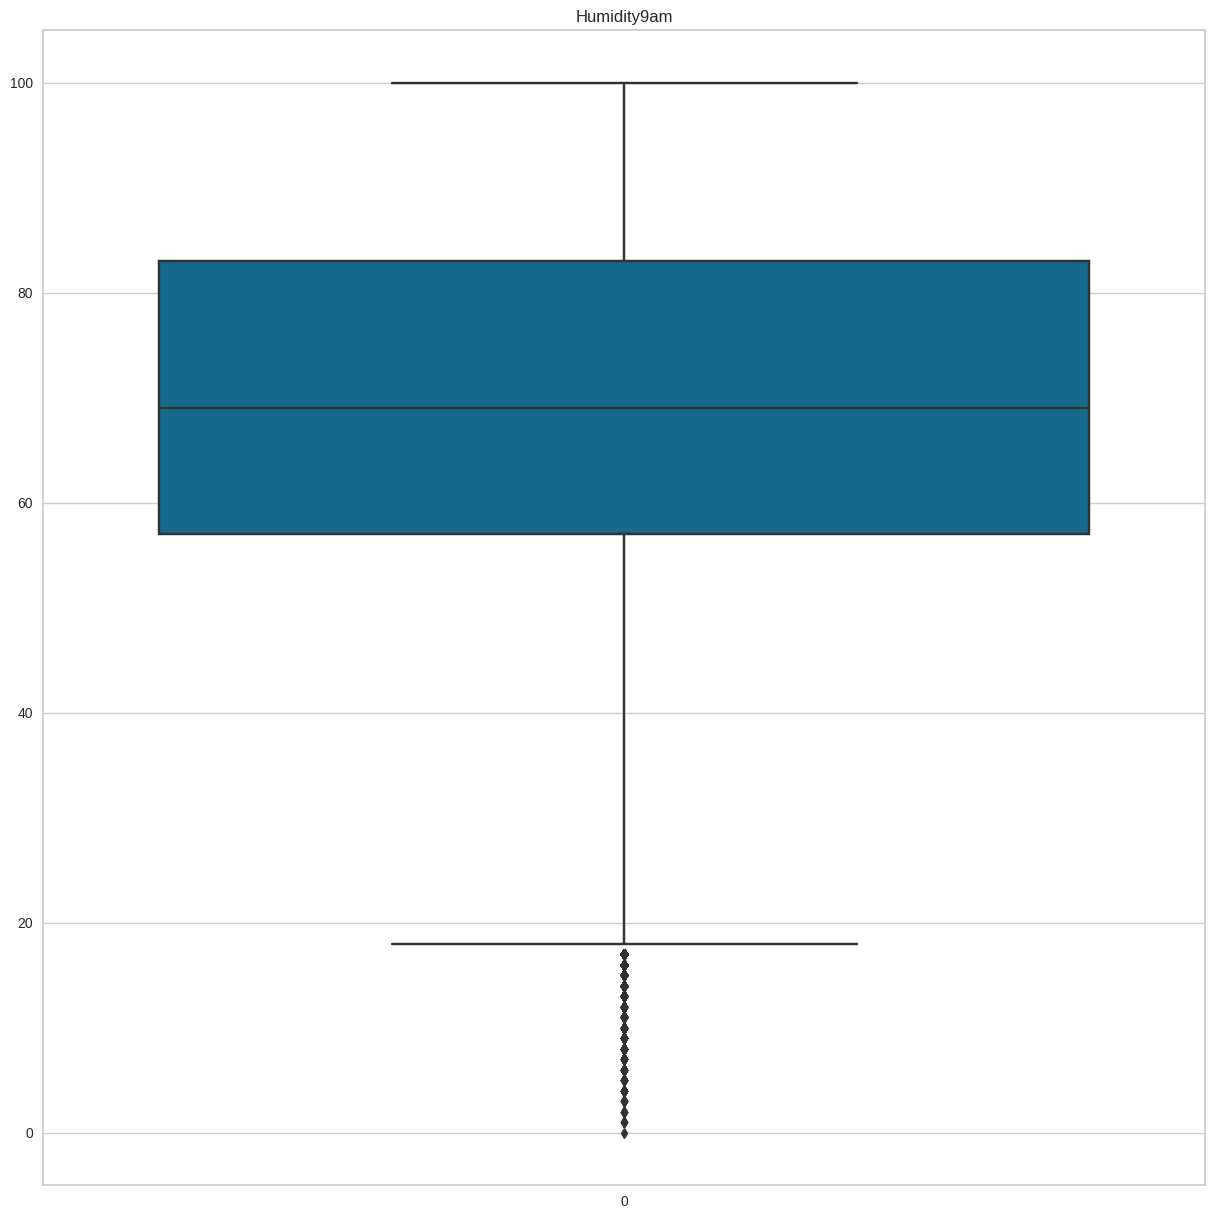

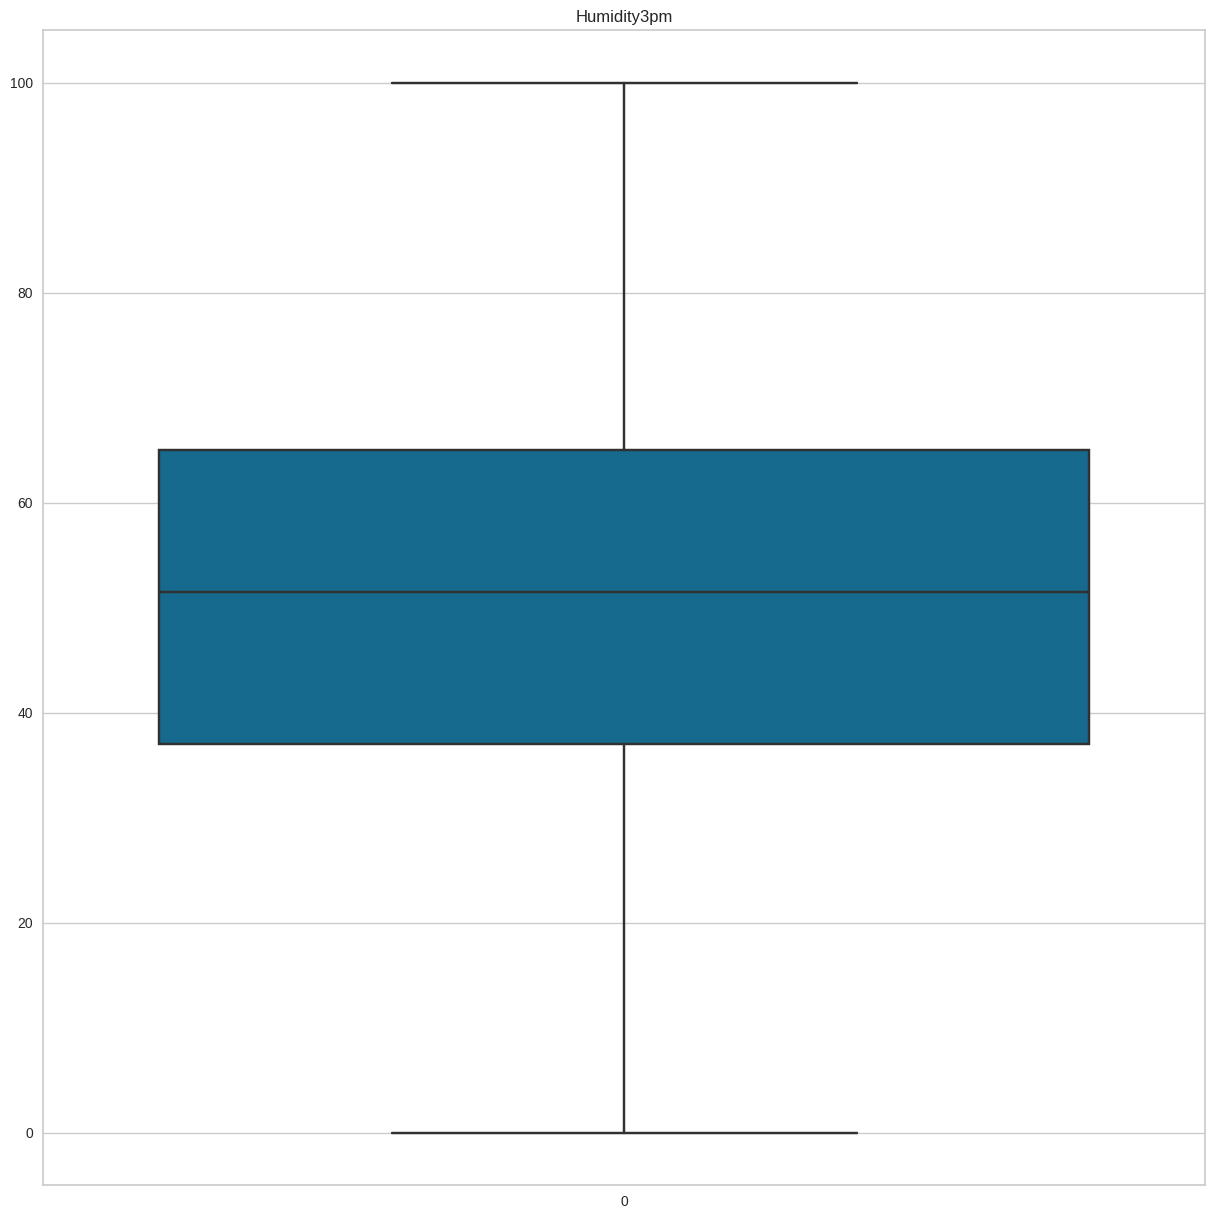

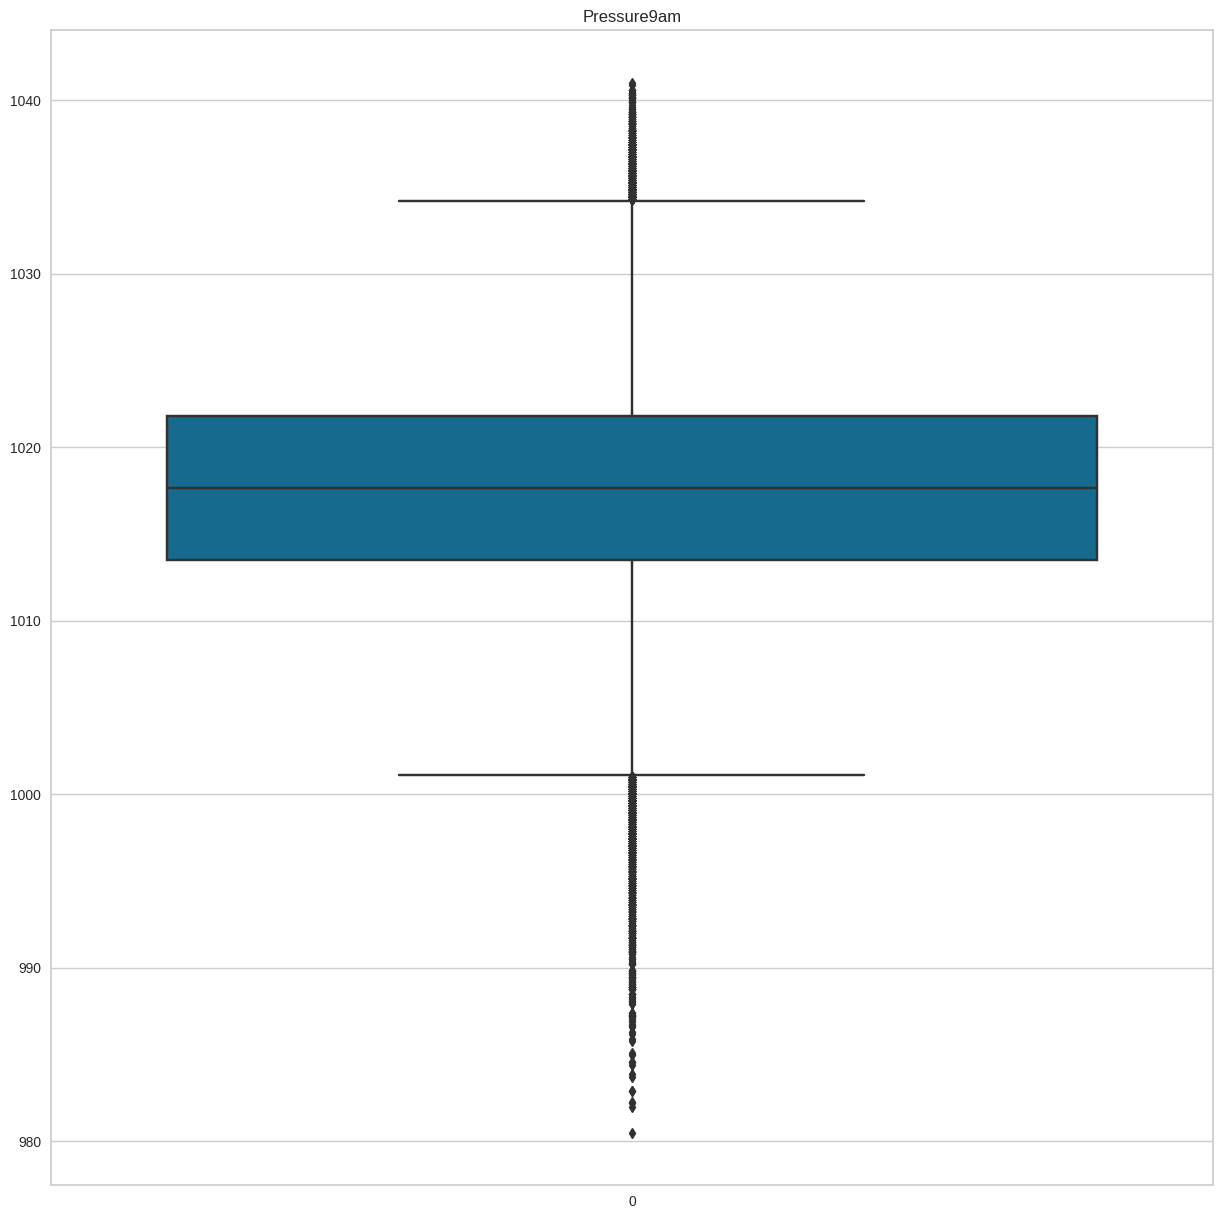

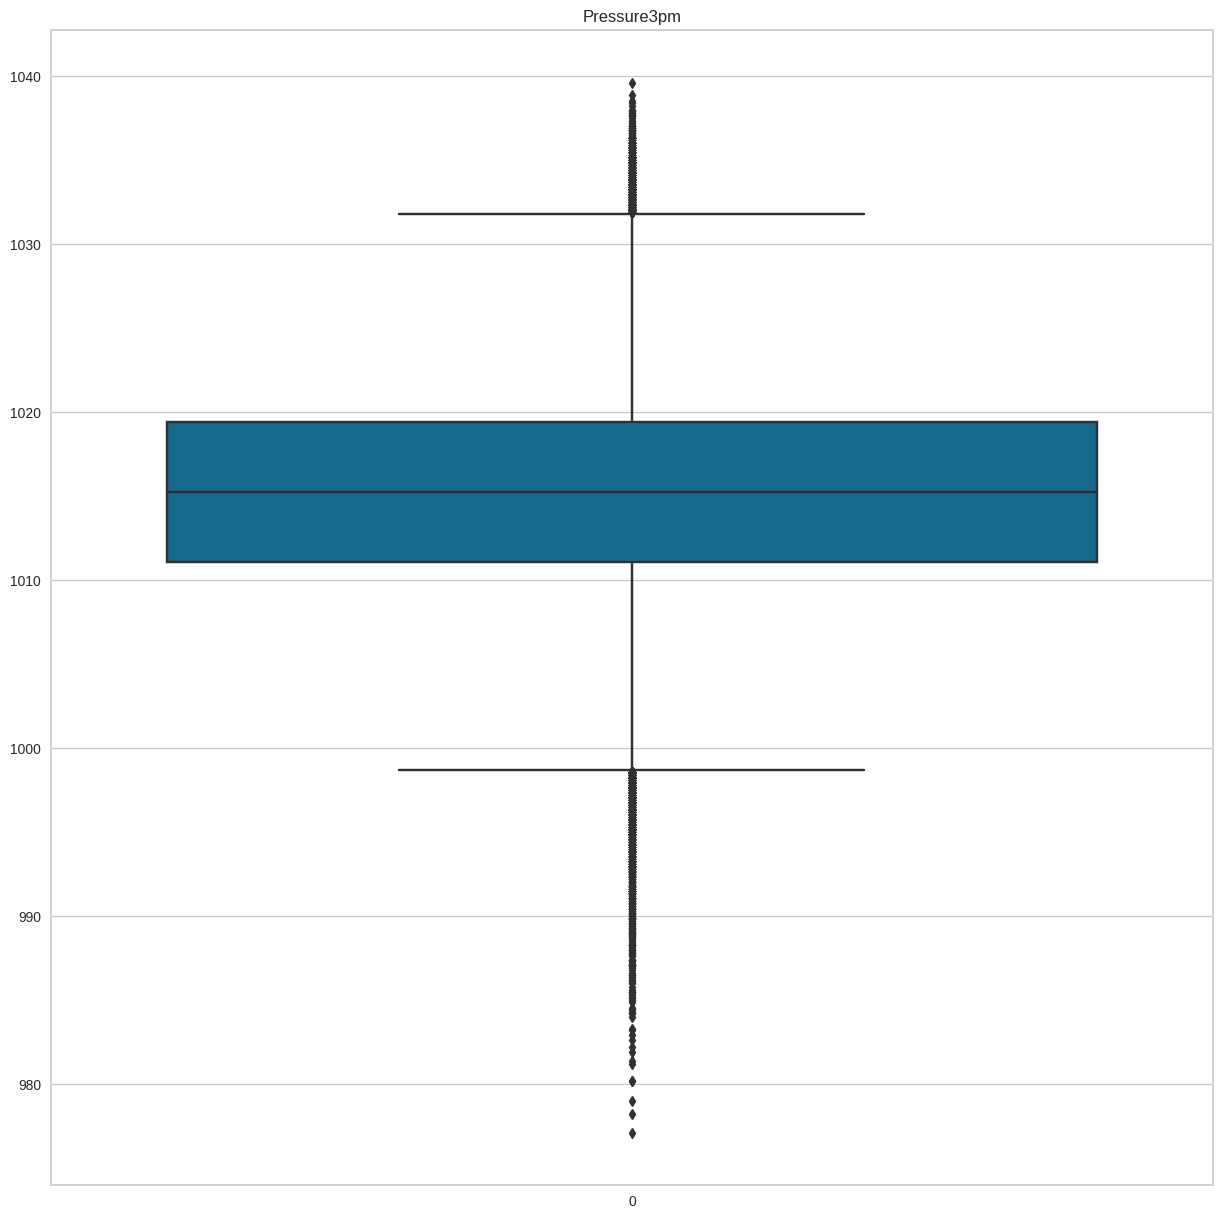

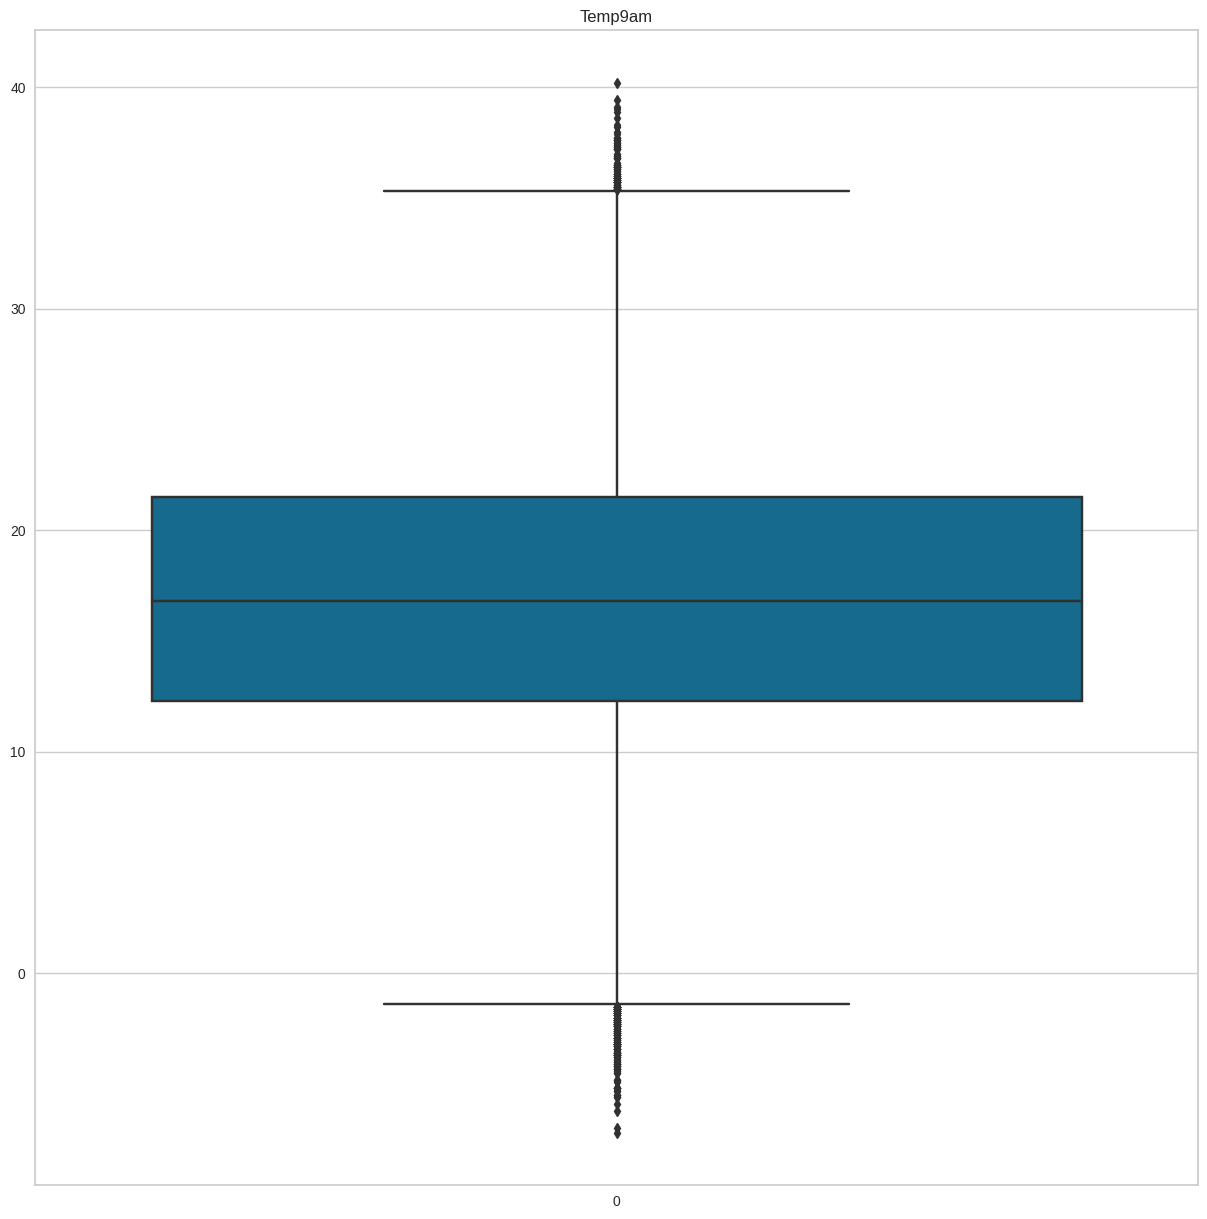

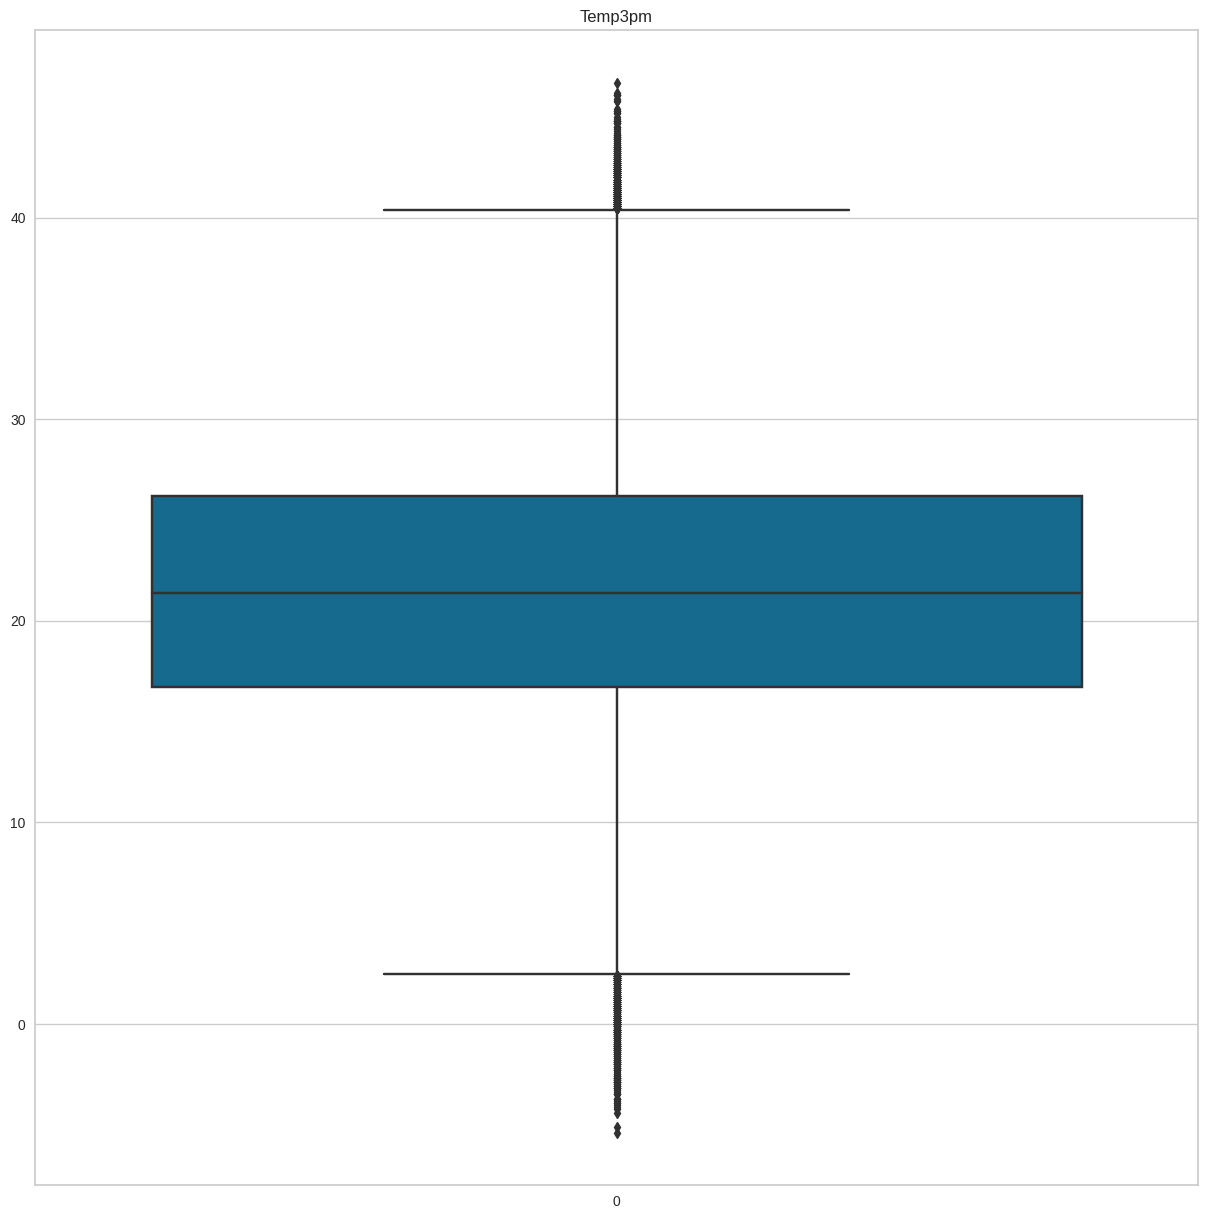

<Figure size 1500x1500 with 0 Axes>

In [44]:
for feature in cont_var:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [45]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,2.4,8.3,W,44.00000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.100000,0.0,3.6,10.0,WNW,44.00000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.700000,0.0,2.6,4.4,WSW,46.00000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.000000,0.0,18.4,8.9,NE,24.00000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.300000,1.0,5.4,3.0,W,41.00000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,1.4,7.8,E,31.00000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.300000,0.0,7.6,13.5,NNW,22.00000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.900000,0.0,6.8,11.0,N,37.00000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0
145458,2017-06-24,Uluru,7.8,27.000000,0.0,2.6,13.2,SE,28.00000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [46]:
for feature in categ_var:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2007-11-01', '2007-12-15', '2008-02-03', '2008-01-31', '2008-01-30',
       '2008-01-19', '2008-01-18', '2008-01-16', '2008-01-12', '2007-11-30',
       ...
       '2008-05-08', '2008-05-09', '2008-01-03', '2008-01-02', '2008-05-10',
       '2008-05-11', '2008-05-12', '2008-05-13', '2008-05-14', '2007-12-25'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

In [47]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [48]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [49]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [50]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [51]:
df_loc = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [52]:
df_loc.head()

RainTomorrow,0,1
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583


In [31]:
df_loc[1].sort_values(ascending = False)

Location
Portland            1095
Cairns               950
Walpole              949
Dartmoor             922
MountGambier         920
NorfolkIsland        919
Albany               902
Witchcliffe          879
CoffsHarbour         869
Sydney               865
Darwin               852
MountGinini          819
NorahHead            808
Ballarat             781
GoldCoast            775
SydneyAirport        774
Hobart               761
Watsonia             738
Newcastle            731
Wollongong           713
Brisbane             709
Williamtown          700
Launceston           699
Adelaide             688
MelbourneAirport     653
Perth                645
Sale                 643
Melbourne            636
Canberra             629
Albury               618
Penrith              595
Nuriootpa            592
BadgerysCreek        583
Tuggeranong          568
PerthAirport         567
Bendigo              562
Richmond             560
WaggaWagga           536
Townsville           519
PearceRAAF      

In [53]:
df_loc[1].sort_values(ascending = False).index

Index(['Portland', 'Cairns', 'Walpole', 'Dartmoor', 'MountGambier',
       'NorfolkIsland', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'Sydney',
       'Darwin', 'MountGinini', 'NorahHead', 'Ballarat', 'GoldCoast',
       'SydneyAirport', 'Hobart', 'Watsonia', 'Newcastle', 'Wollongong',
       'Brisbane', 'Williamtown', 'Launceston', 'Adelaide', 'MelbourneAirport',
       'Perth', 'Sale', 'Melbourne', 'Canberra', 'Albury', 'Penrith',
       'Nuriootpa', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Bendigo',
       'Richmond', 'WaggaWagga', 'Townsville', 'PearceRAAF', 'SalmonGums',
       'Moree', 'Cobar', 'Mildura', 'Katherine', 'AliceSprings', 'Nhil',
       'Woomera', 'Uluru'],
      dtype='object', name='Location')

In [54]:
mapped_location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(mapped_location)

In [55]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [56]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5


In [58]:
df= df.drop(['Date'],axis=1)

In [59]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,30,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5


In [39]:
import scipy.stats as stats
import pylab

In [40]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

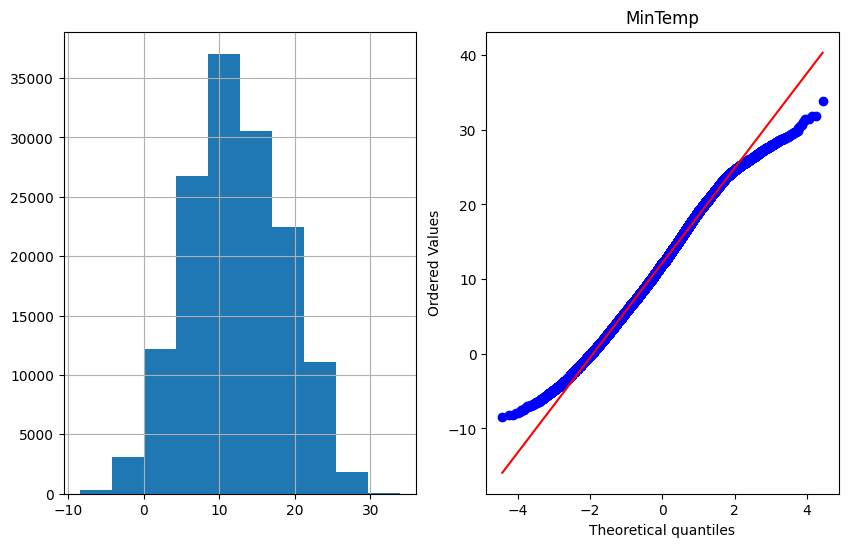

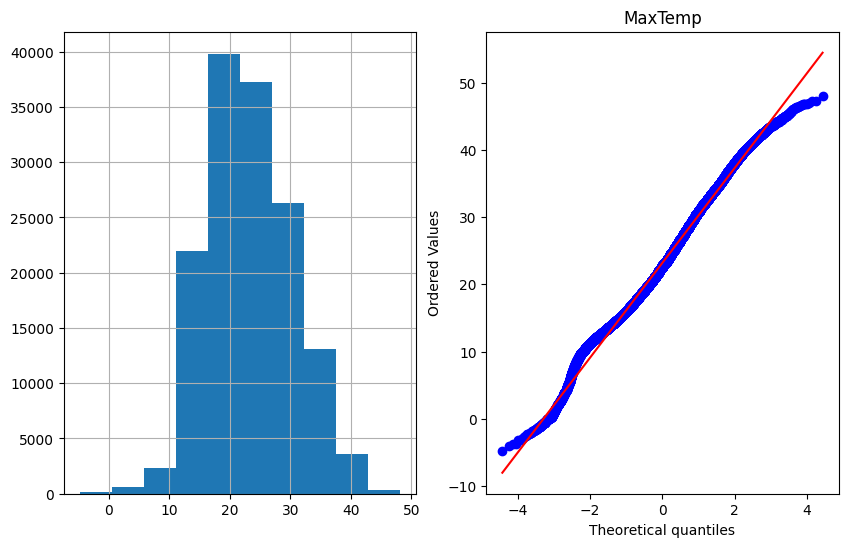

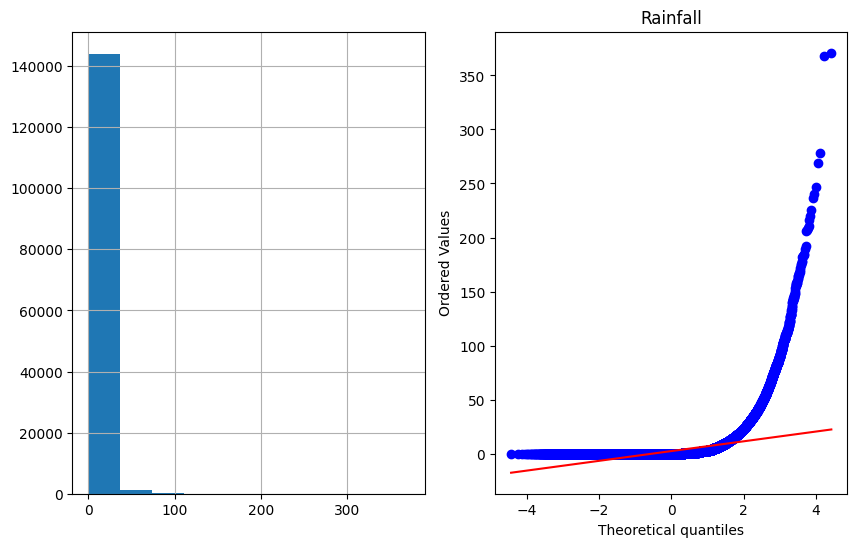

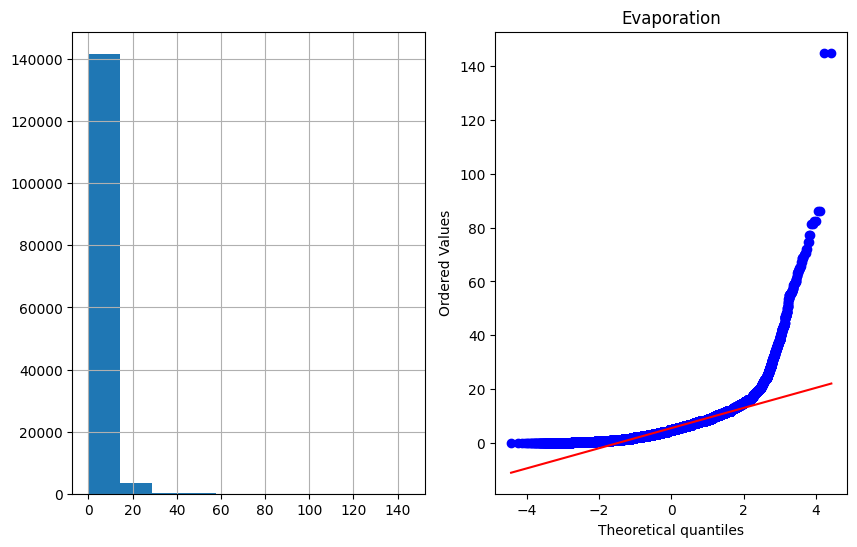

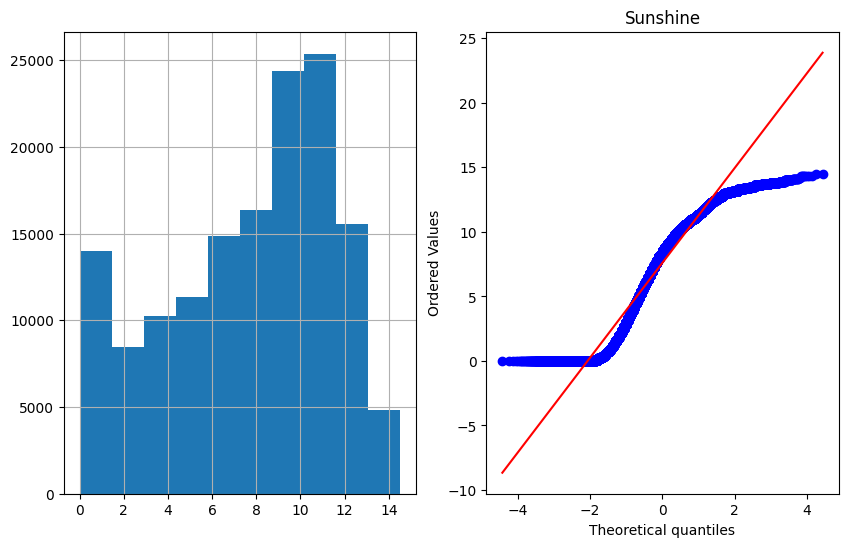

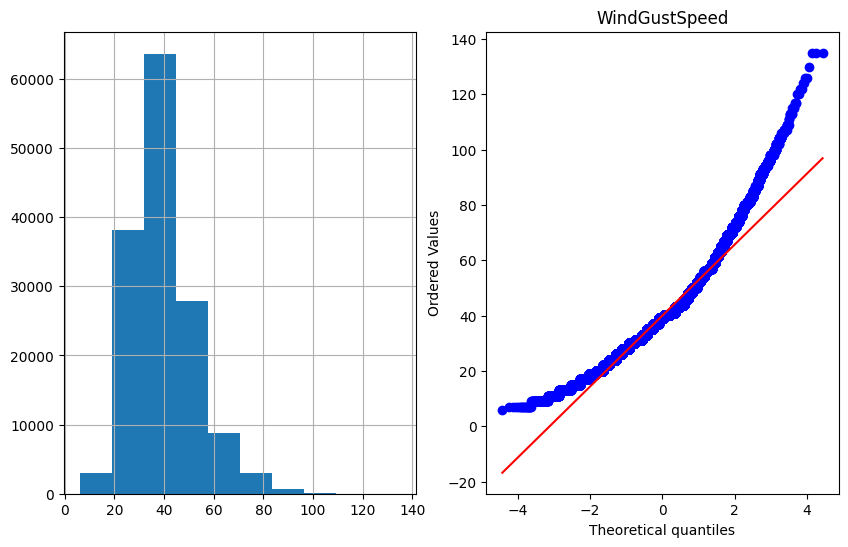

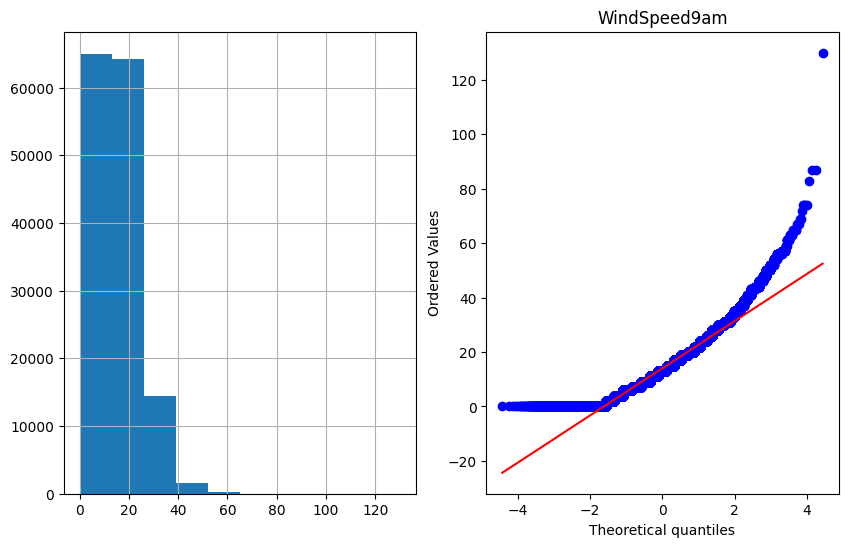

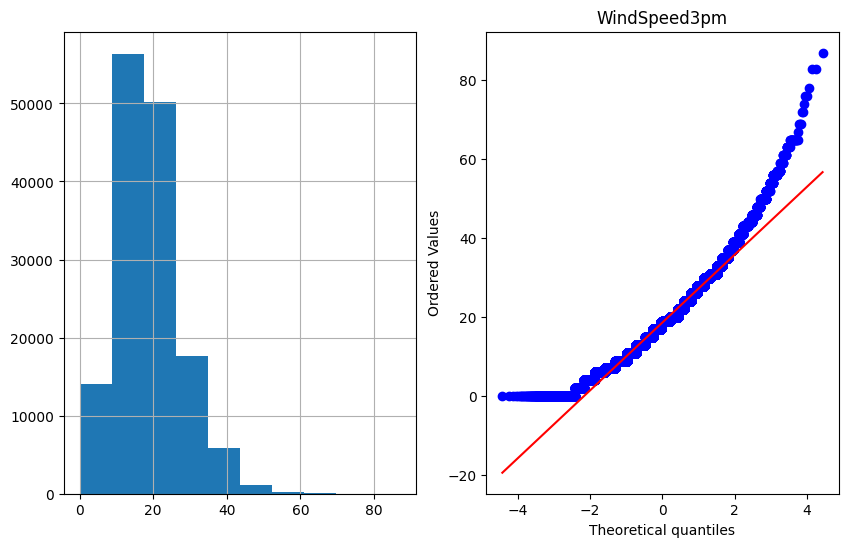

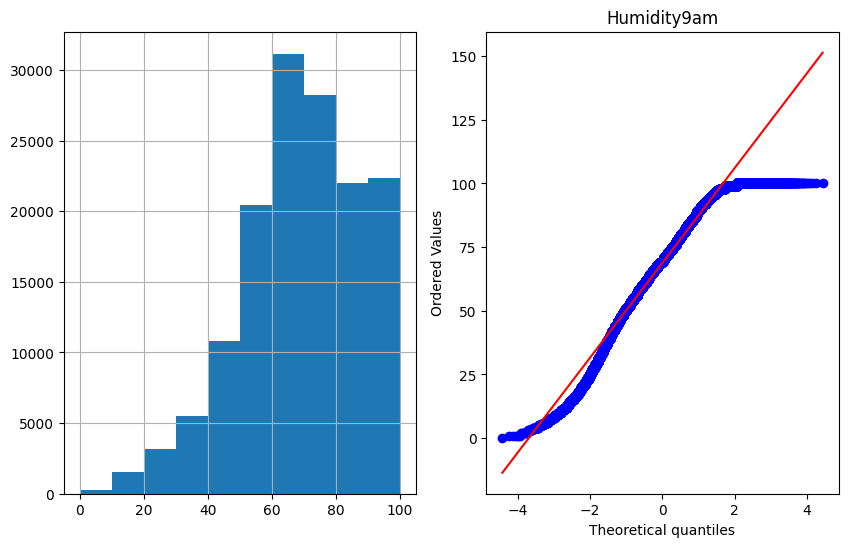

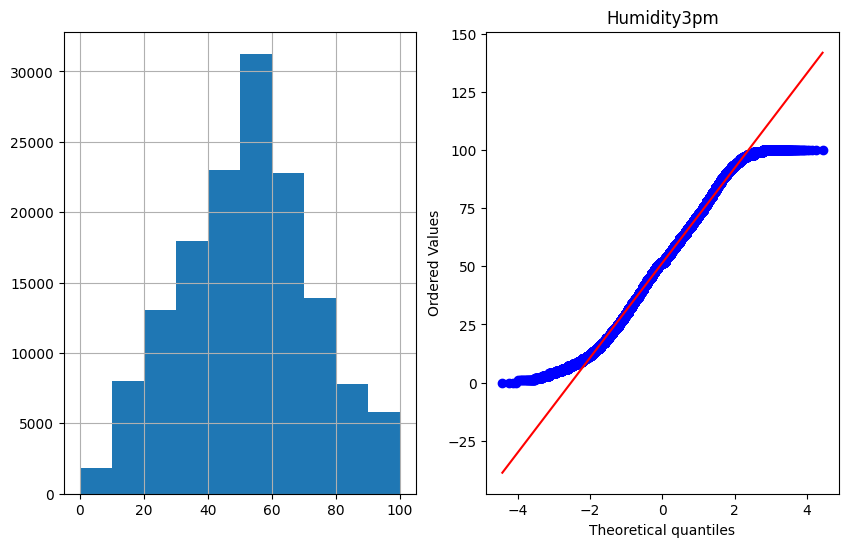

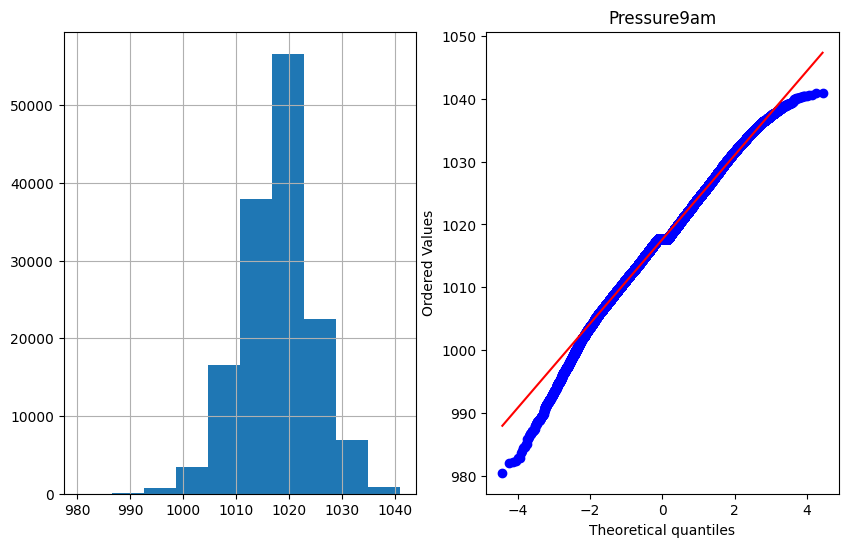

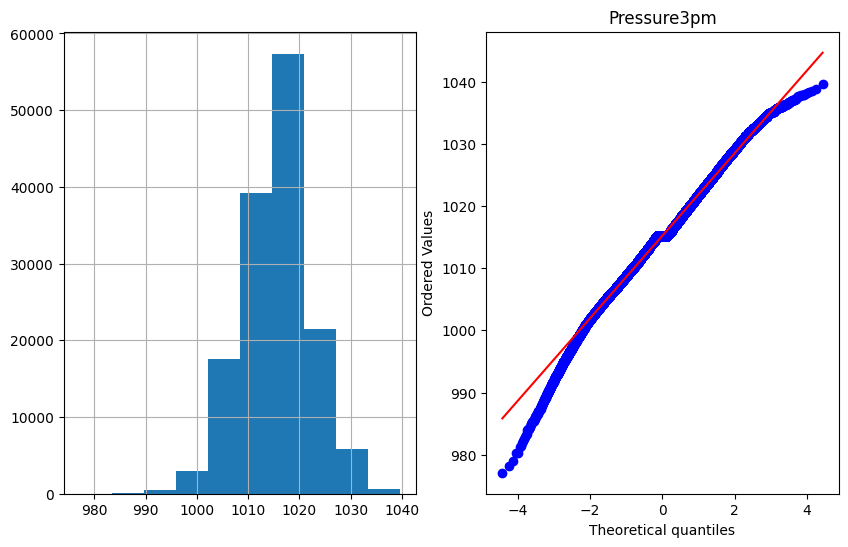

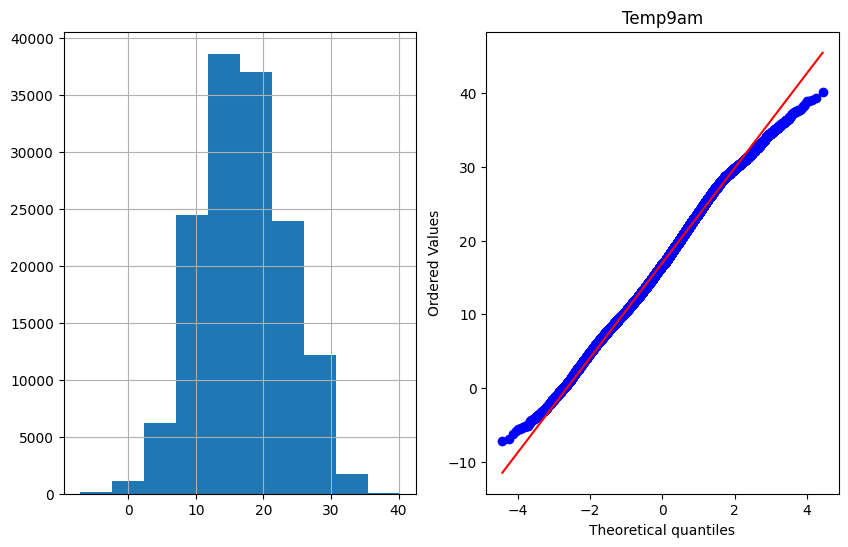

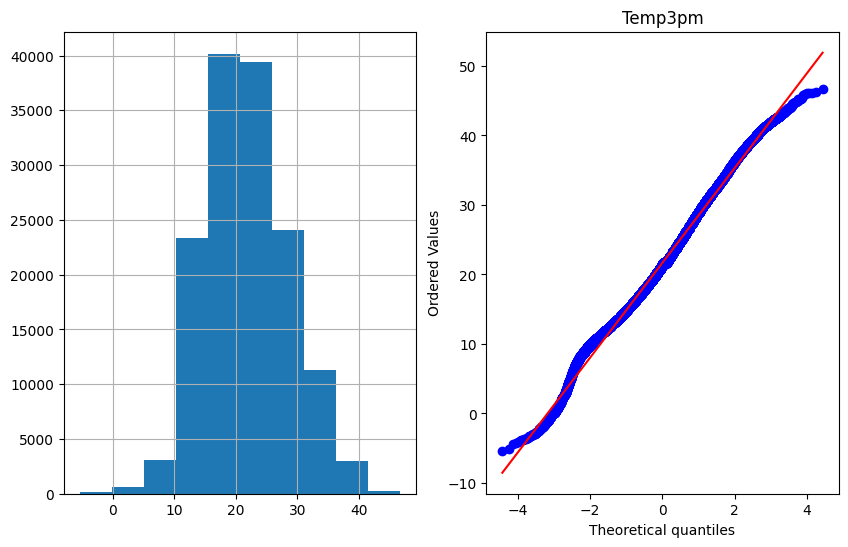

In [41]:
for i in cont_var:
    plot_curve(df, i)

In [42]:
x = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scale=StandardScaler()

In [45]:
scale.fit(x)

StandardScaler()

In [46]:
X= scale.transform(x)

In [47]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Date_month', 'Date_day'],
      dtype='object')

In [48]:
X=pd.DataFrame(X,columns=x.columns)

In [49]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Date_month,Date_day
0,0.415017,0.189447,-0.045336,-0.210072,-0.727927,0.182347,-0.740424,0.302234,-0.406066,-1.024910,0.672222,0.612323,0.112395,-1.442965,-1.478788,-1.223882,1.230562,-1.657694,-0.014053,0.017023,-0.529795,1.634076,-1.672844
1,0.415017,-0.753101,0.265043,-0.281650,-0.442930,0.631373,-1.187566,0.302234,-1.439618,-0.357114,-1.133438,0.382874,-1.319609,-1.296417,-1.047782,-1.118839,0.884261,-1.289981,0.032464,0.381985,-0.529795,1.634076,-1.559140
2,0.415017,0.110901,0.349692,-0.281650,-0.680427,-0.847773,-0.516853,0.454694,-0.406066,-0.357114,0.559368,0.841771,-1.637832,-1.052171,-1.493650,-0.983784,1.230562,-0.922267,0.621685,0.221402,-0.529795,1.634076,-1.445436
3,0.415017,-0.470337,0.674180,-0.281650,3.072032,0.340827,0.824574,-1.222364,1.247616,1.423675,-0.343462,-1.108541,-1.266572,-1.736061,-0.007422,-0.368534,-1.539848,0.180874,0.172017,0.703151,-0.529795,1.634076,-1.331732
4,0.415017,0.833521,1.280830,-0.162353,-0.015435,-1.217559,-0.740424,0.073544,1.040905,-1.692706,-0.794877,0.153426,0.695804,-0.905623,-1.018057,-1.388949,0.884261,1.284015,0.125499,1.170302,-0.529795,1.634076,-1.218028


In [50]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: uint8

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 0)

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
ranfor= RandomForestClassifier()

In [54]:
ranfor.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
ypred= ranfor.predict(X_test)

In [56]:
print(confusion_matrix(y_test,ypred))
print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))

[[21798   928]
 [ 3317  3049]]
0.8540835968651176
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22726
           1       0.77      0.48      0.59      6366

    accuracy                           0.85     29092
   macro avg       0.82      0.72      0.75     29092
weighted avg       0.85      0.85      0.84     29092



In [59]:
pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


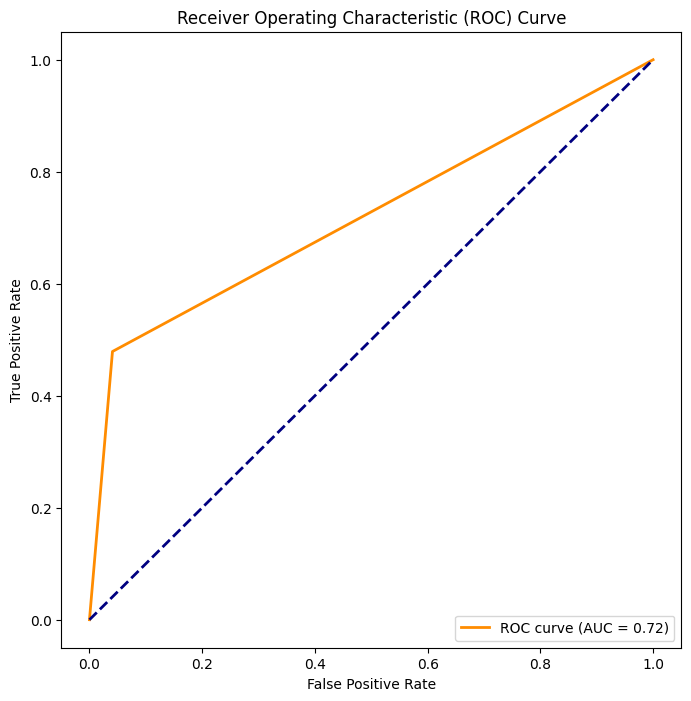

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming ypred is your predicted probabilities
fpr, tpr, _ = roc_curve(y_test, ypred)

# Compute ROC curve area (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [65]:
!pip install --upgrade scikit-learn


In [66]:
import sklearn
print(sklearn.__version__)


1.2.2


In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn = KNeighborsClassifier(n_neighbors=3)

In [70]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
ypred3= knn.predict(X_test)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7a0b40b56a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


In [72]:
print(confusion_matrix(y_test,ypred3))
print(accuracy_score(y_test,ypred3))
print(classification_report(y_test,ypred3))

[[20945  1781]
 [ 3214  3152]]
0.8283033136257391
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     22726
           1       0.64      0.50      0.56      6366

    accuracy                           0.83     29092
   macro avg       0.75      0.71      0.73     29092
weighted avg       0.82      0.83      0.82     29092



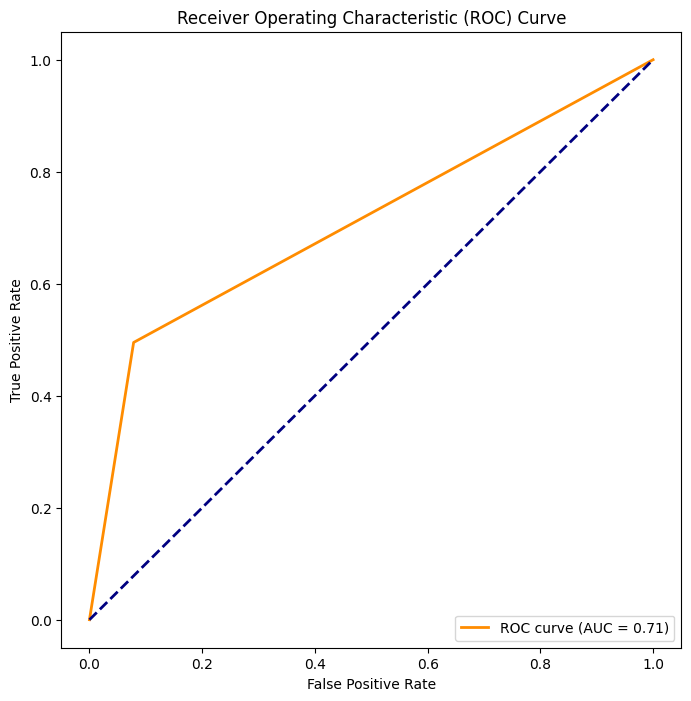

In [74]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming ypred3 is your predicted probabilities
fpr, tpr, _ = roc_curve(y_test, ypred3)

# Compute ROC curve area (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [75]:
from xgboost import XGBClassifier

In [76]:
xgb= XGBClassifier()

In [77]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [78]:
ypred4= xgb.predict(X_test)

In [79]:
print(confusion_matrix(y_test,ypred4))
print(accuracy_score(y_test,ypred4))
print(classification_report(y_test,ypred4))

[[21535  1191]
 [ 2934  3432]]
0.8582084421834181
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22726
           1       0.74      0.54      0.62      6366

    accuracy                           0.86     29092
   macro avg       0.81      0.74      0.77     29092
weighted avg       0.85      0.86      0.85     29092



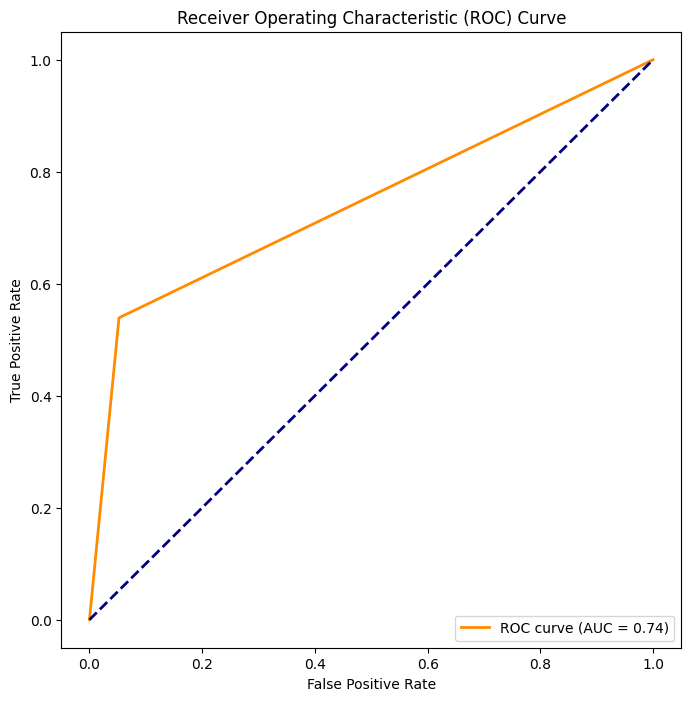

In [81]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming ypred4 is your predicted probabilities
fpr, tpr, _ = roc_curve(y_test, ypred4)

# Compute ROC curve area (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [82]:
import pickle

In [83]:
file = open('rain_XGBnew_model.pkl', 'wb')

In [84]:
pickle.dump(xgb, file)

In [86]:
import os

file_path = "rain_XGBnew_model.pkl"
if os.path.exists(file_path):
    print("File exists.")
else:
    print("File not found.")


File exists.


In [89]:
!pip install --upgrade scikit-learn


In [90]:
import sklearn
print(sklearn.__version__)


1.2.2


In [91]:
!pip install scikit-learn==1.2.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 9.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [3]:
import os

file_path = "rain_XGBnew_model.pkl"
if os.path.exists(file_path):
    print("File exists.")
else:
    print("File not found.")


File exists.


In [4]:
import pickle

# Recreate and train your XGBoost model
xgb_model = ...

# Save the model using pickle
with open("rain_XGBnew_model.pkl", "wb") as file:
    pickle.dump(xgb_model, file)
with open("rain_XGBnew_model.pkl", "wb") as file:
    pickle.dump(xgb_model, file)



In [5]:
model = pickle.load(open("rain_XGBnew_model.pkl", "rb"))

In [6]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.2 MB/s et

In [7]:
from pycaret.classification import *

In [11]:
df = df.dropna(subset=['RainTomorrow'])


In [12]:
df['RainTomorrow'].fillna(value='unknown', inplace=True)  # Replace 'unknown' with the desired value


In [15]:
import pandas as pd
from pycaret.classification import setup

# Load your data into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')  # Replace 'your_data.csv' with your actual file path or data source

# Drop rows with missing values in the target column
df = df.dropna(subset=['RainTomorrow'])

# Use the setup function
model = setup(data=df, target='RainTomorrow')


,Description,Value
0,Session id,7524
1,Target,RainTomorrow
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(142193, 23)"
5,Transformed data shape,"(142193, 68)"
6,Transformed train set shape,"(99535, 68)"
7,Transformed test set shape,"(42658, 68)"
8,Ordinal features,1
9,Numeric features,16


In [16]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8600,0.8958,0.8600,0.8530,0.8538,0.5650,0.5712,4.3120
rf,Random Forest Classifier,0.8587,0.8931,0.8587,0.8514,0.8484,0.5417,0.5570,25.1280
lightgbm,Light Gradient Boosting Machine,0.8579,0.8906,0.8579,0.8503,0.8507,0.5539,0.5617,6.8650
et,Extra Trees Classifier,0.8562,0.8919,0.8562,0.8490,0.8441,0.5266,0.5459,27.1620
gbc,Gradient Boosting Classifier,0.8506,0.8779,0.8506,0.8417,0.8410,0.5216,0.5331,32.9720
lda,Linear Discriminant Analysis,0.8445,0.8698,0.8445,0.8348,0.8355,0.5067,0.5158,3.2740
ridge,Ridge Classifier,0.8440,0.0000,0.8440,0.8342,0.8298,0.4814,0.5020,1.7550
lr,Logistic Regression,0.8439,0.8674,0.8439,0.8338,0.8332,0.4970,0.5095,20.8300
ada,Ada Boost Classifier,0.8429,0.8650,0.8429,0.8329,0.8336,0.5004,0.5100,8.4600
knn,K Neighbors Classifier,0.8321,0.8109,0.8321,0.8208,0.8226,0.4683,0.4764,18.9880


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [17]:
lightgbm= create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8579,0.8867,0.8579,0.8504,0.8507,0.5539,0.5618
1,0.8634,0.8979,0.8634,0.8565,0.8563,0.5706,0.5790
2,0.8576,0.8896,0.8576,0.8500,0.8503,0.5524,0.5606
3,0.8522,0.8896,0.8522,0.8438,0.8443,0.5342,0.5426
4,0.8546,0.8915,0.8546,0.8467,0.8475,0.5447,0.5520
5,0.8602,0.8899,0.8602,0.8531,0.8535,0.5630,0.5702
6,0.8609,0.8907,0.8609,0.8538,0.8540,0.5638,0.5716
7,0.8545,0.8851,0.8545,0.8464,0.8467,0.5412,0.5498
8,0.8616,0.8984,0.8616,0.8546,0.8548,0.5664,0.5741


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pycaret.classification import *

# Load your data into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')  # Replace 'your_data.csv' with your actual file path or data source

# Drop rows with missing values in the target column
df = df.dropna(subset=['RainTomorrow'])

# Assume you have defined 'setup' and trained a model named 'lightgbm_model'
setup_result = setup(data=df, target='RainTomorrow')
lightgbm_model = create_model('lightgbm')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('RainTomorrow', axis=1), df['RainTomorrow'], test_size=0.2, random_state=42)

# Use the trained model for predictions
pred_holdout = predict_model(lightgbm_model, data=X_test)


,Description,Value
0,Session id,7031
1,Target,RainTomorrow
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(142193, 23)"
5,Transformed data shape,"(142193, 68)"
6,Transformed train set shape,"(99535, 68)"
7,Transformed test set shape,"(42658, 68)"
8,Ordinal features,1
9,Numeric features,16


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8551,0.8862,0.8551,0.8473,0.8480,0.5465,0.5538
1,0.8618,0.8927,0.8618,0.8547,0.8548,0.5663,0.5743
2,0.8551,0.8868,0.8551,0.8471,0.8474,0.5433,0.5519
3,0.8602,0.8866,0.8602,0.8530,0.8534,0.5627,0.5700
4,0.8585,0.8913,0.8585,0.8512,0.8517,0.5576,0.5648
5,0.8596,0.8866,0.8596,0.8524,0.8529,0.5611,0.5683
6,0.8639,0.8948,0.8639,0.8570,0.8566,0.5709,0.5798
7,0.8641,0.8912,0.8641,0.8572,0.8570,0.5723,0.5808
8,0.8618,0.8949,0.8618,0.8547,0.8548,0.5662,0.5741


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
pred_holdout

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,prediction_label,prediction_score
57760,2016-06-09,Ballarat,7.1,13.000000,8.8,NaN,NaN,N,41.0,N,...,98.0,1001.700012,1005.400024,8.0,8.0,8.600000,11.500000,Yes,Yes,0.8933
127128,2009-10-24,Walpole,13.2,18.299999,0.0,NaN,NaN,E,48.0,ESE,...,73.0,1027.599976,1023.799988,NaN,NaN,14.200000,17.000000,No,No,0.8597
119994,2015-09-21,PerthAirport,9.2,22.700001,0.0,5.0,11.1,ENE,52.0,ENE,...,25.0,1030.099976,1025.900024,0.0,0.0,15.100000,22.500000,No,No,0.9952
7088,2011-12-06,Cobar,15.3,26.100000,0.0,10.4,NaN,E,44.0,E,...,40.0,1013.200012,1009.799988,7.0,7.0,17.500000,24.299999,No,No,0.9066
62992,2014-03-15,Sale,11.9,31.799999,0.0,5.0,4.1,NW,72.0,E,...,25.0,1006.700012,1001.000000,7.0,6.0,16.200001,27.400000,No,Yes,0.7752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59458,2012-08-08,Bendigo,2.7,9.700000,0.0,NaN,NaN,NE,26.0,E,...,95.0,1017.900024,1015.599976,8.0,8.0,6.800000,8.100000,No,Yes,0.9259
73138,2016-10-05,Mildura,5.0,22.900000,3.4,5.5,10.8,WNW,41.0,NW,...,32.0,1019.900024,1018.400024,1.0,2.0,10.900000,21.000000,Yes,No,0.9854
35876,2015-09-12,SydneyAirport,11.2,26.100000,0.0,7.4,10.4,E,31.0,NW,...,38.0,1028.300049,1024.599976,1.0,5.0,18.100000,22.100000,No,No,0.9863
59558,2012-11-16,Bendigo,8.3,20.799999,0.0,NaN,NaN,SSE,46.0,SE,...,36.0,1015.099976,1013.799988,2.0,NaN,13.800000,20.100000,No,No,0.9454
